In [23]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Oyan_dam.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.describe()[['Solar Radiation', 'Sunlight hours', 'ETo']]





Solar Radiation  Sunlight hours         ETo
count       458.000000      458.000000  458.000000
mean         16.087737        9.362757    4.007620
std           2.884135        0.765566    0.626141
min           9.141120        6.272222    2.910000
25%          13.456800        8.922639    3.452500
50%          16.519680        9.615833    3.990000
75%          18.420480        9.937014    4.500000
max          22.412160       10.486111    5.570000

### Checking for missing values

In [24]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [25]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

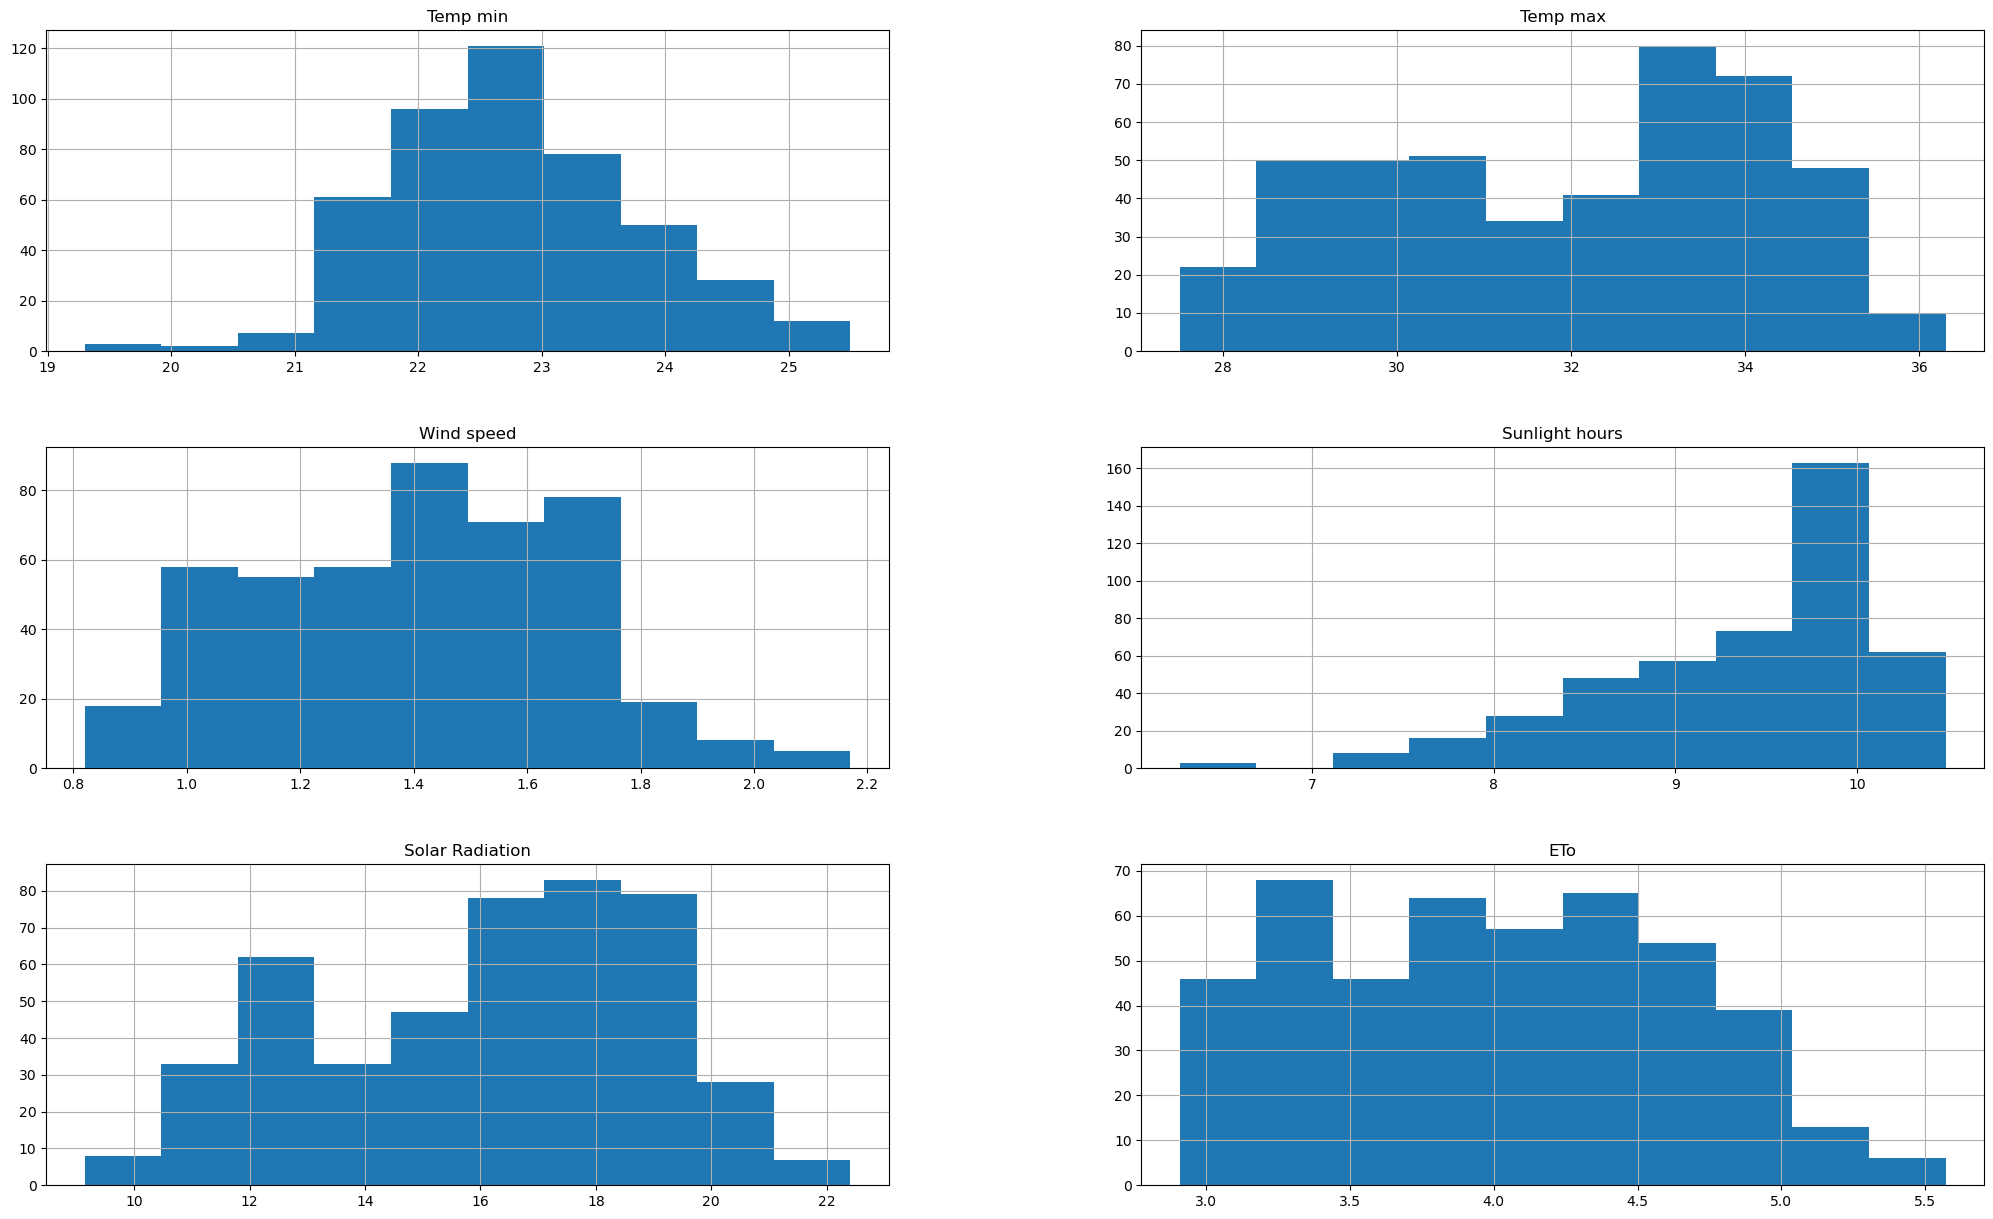

In [26]:
data.hist(figsize=(25,15))

<AxesSubplot:>

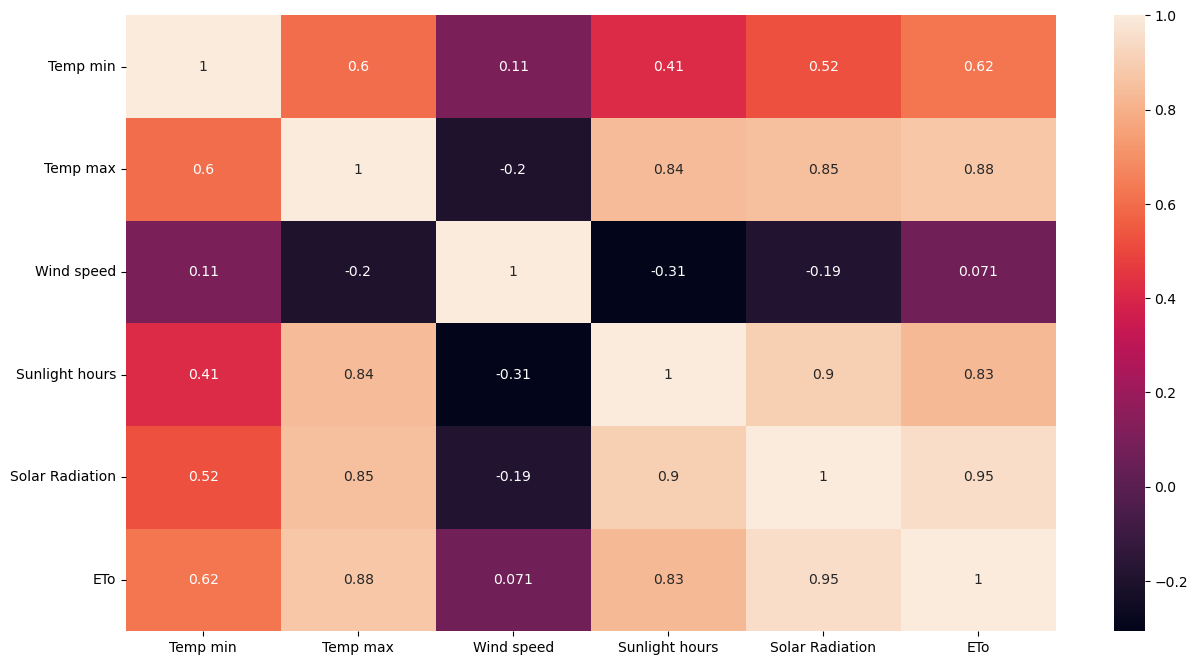

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

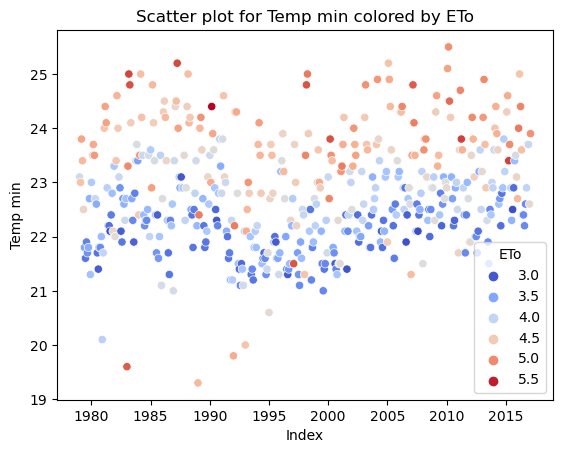

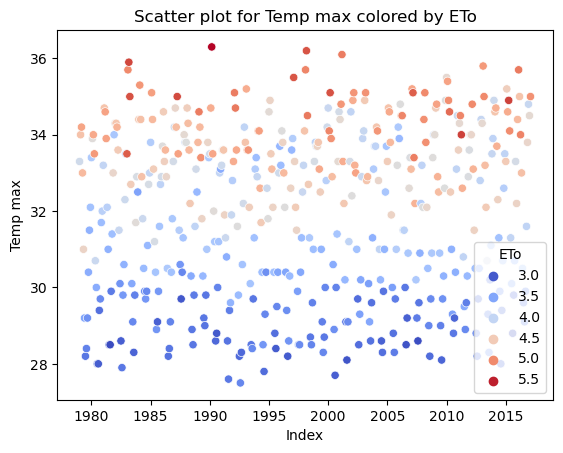

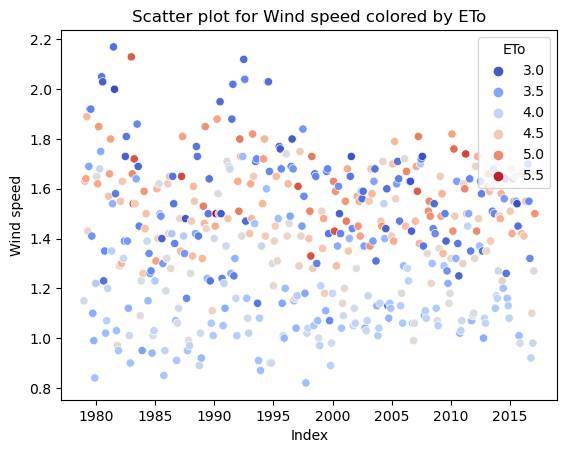

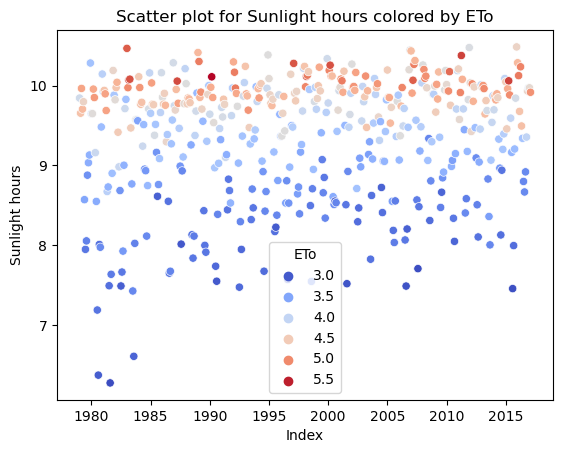

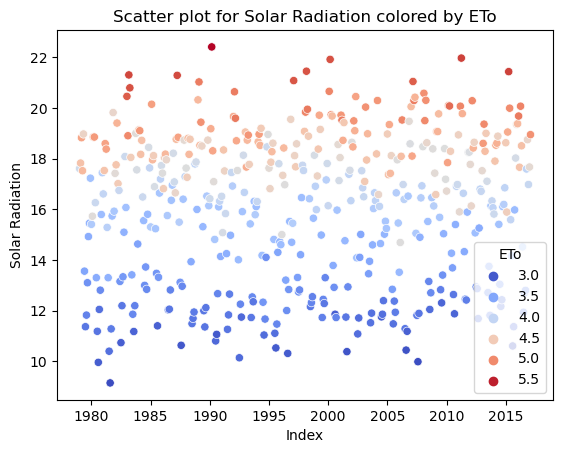

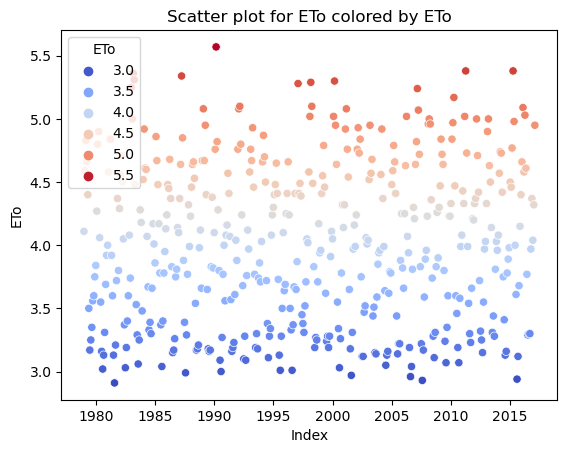

In [28]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

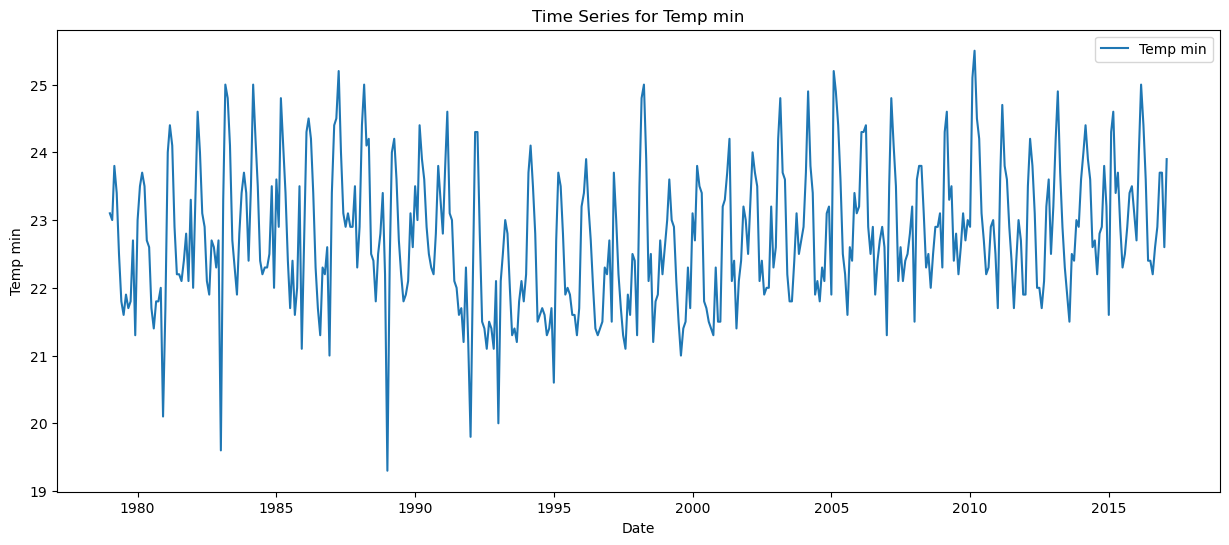

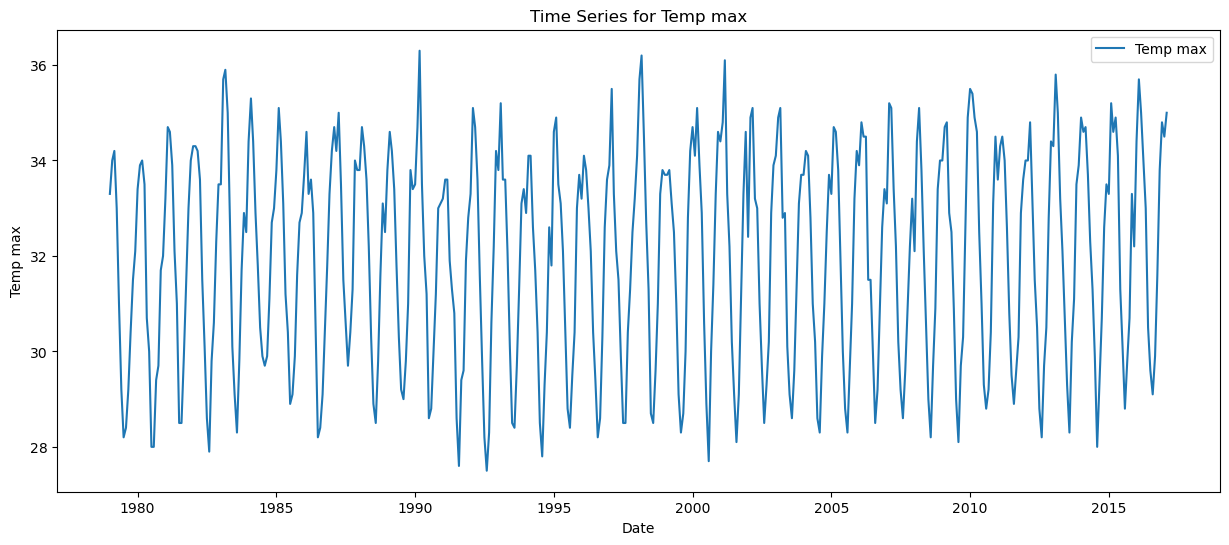

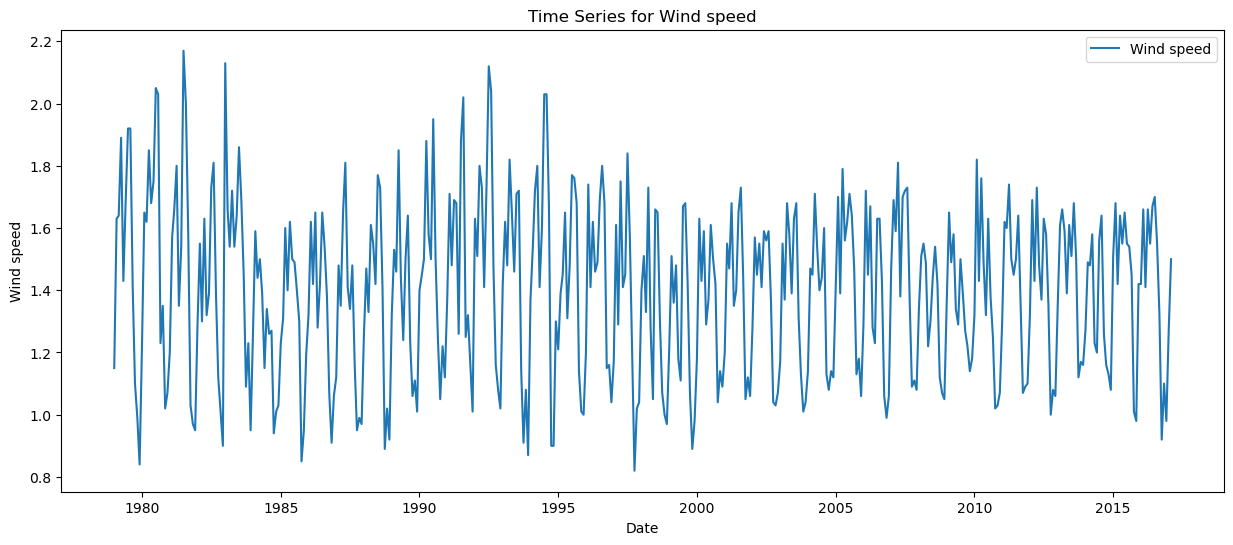

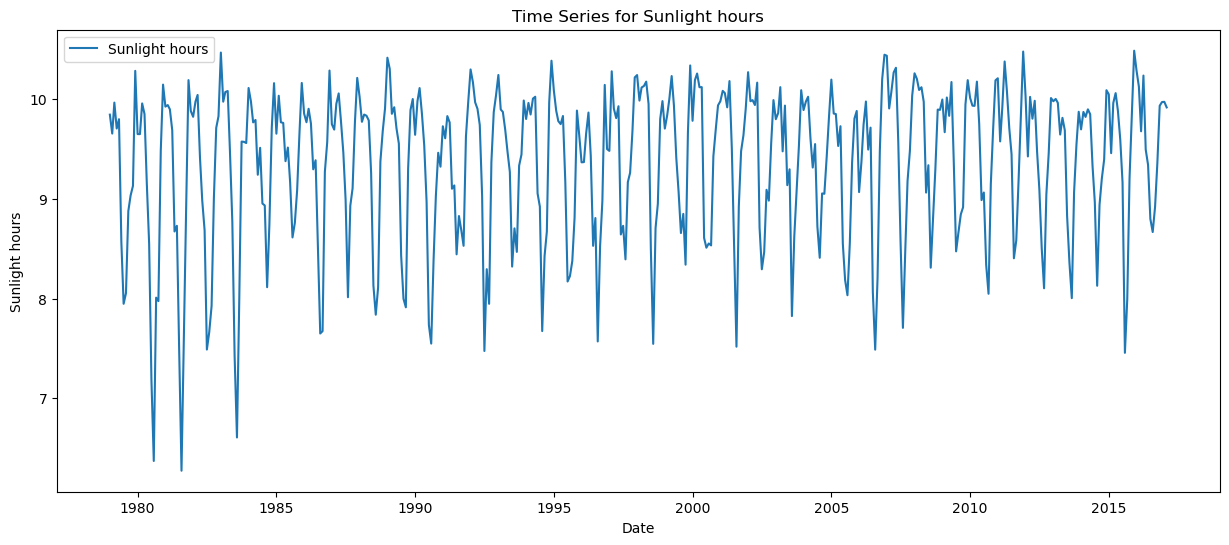

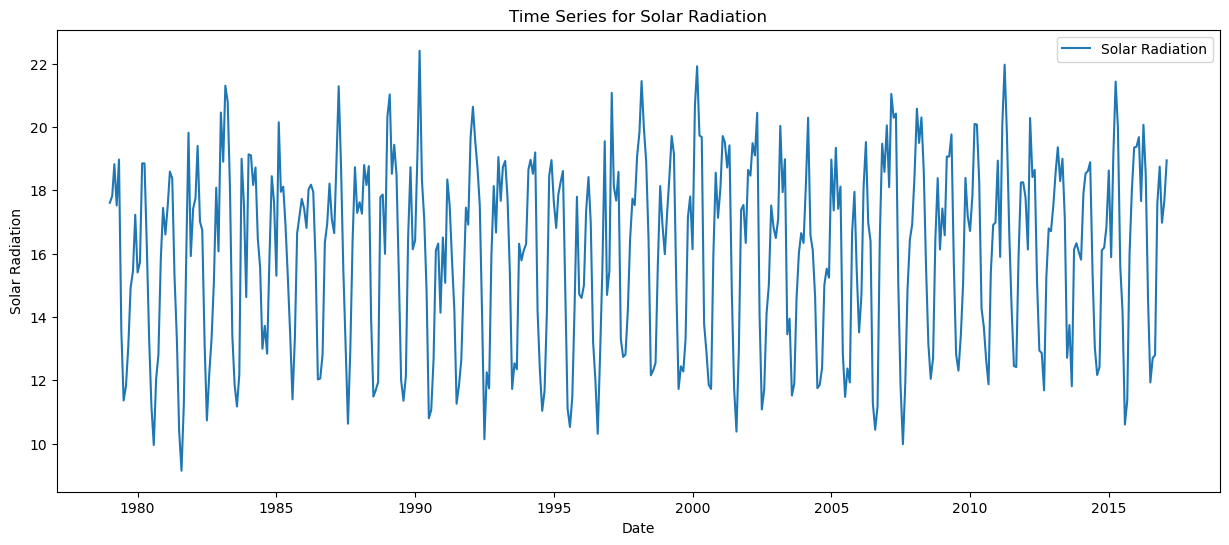

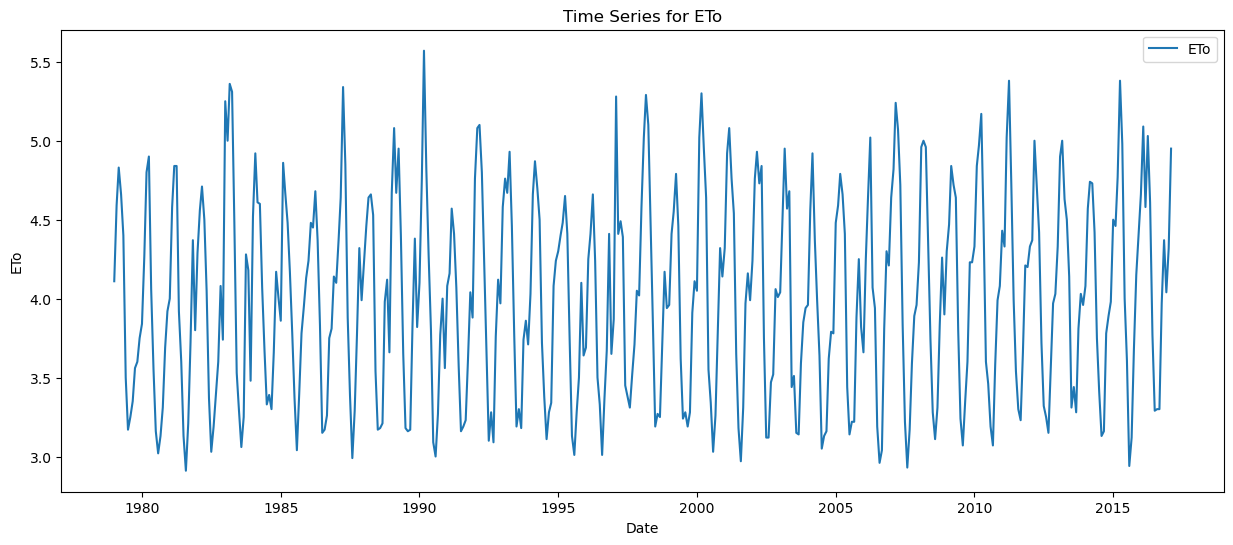

In [29]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [30]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [31]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


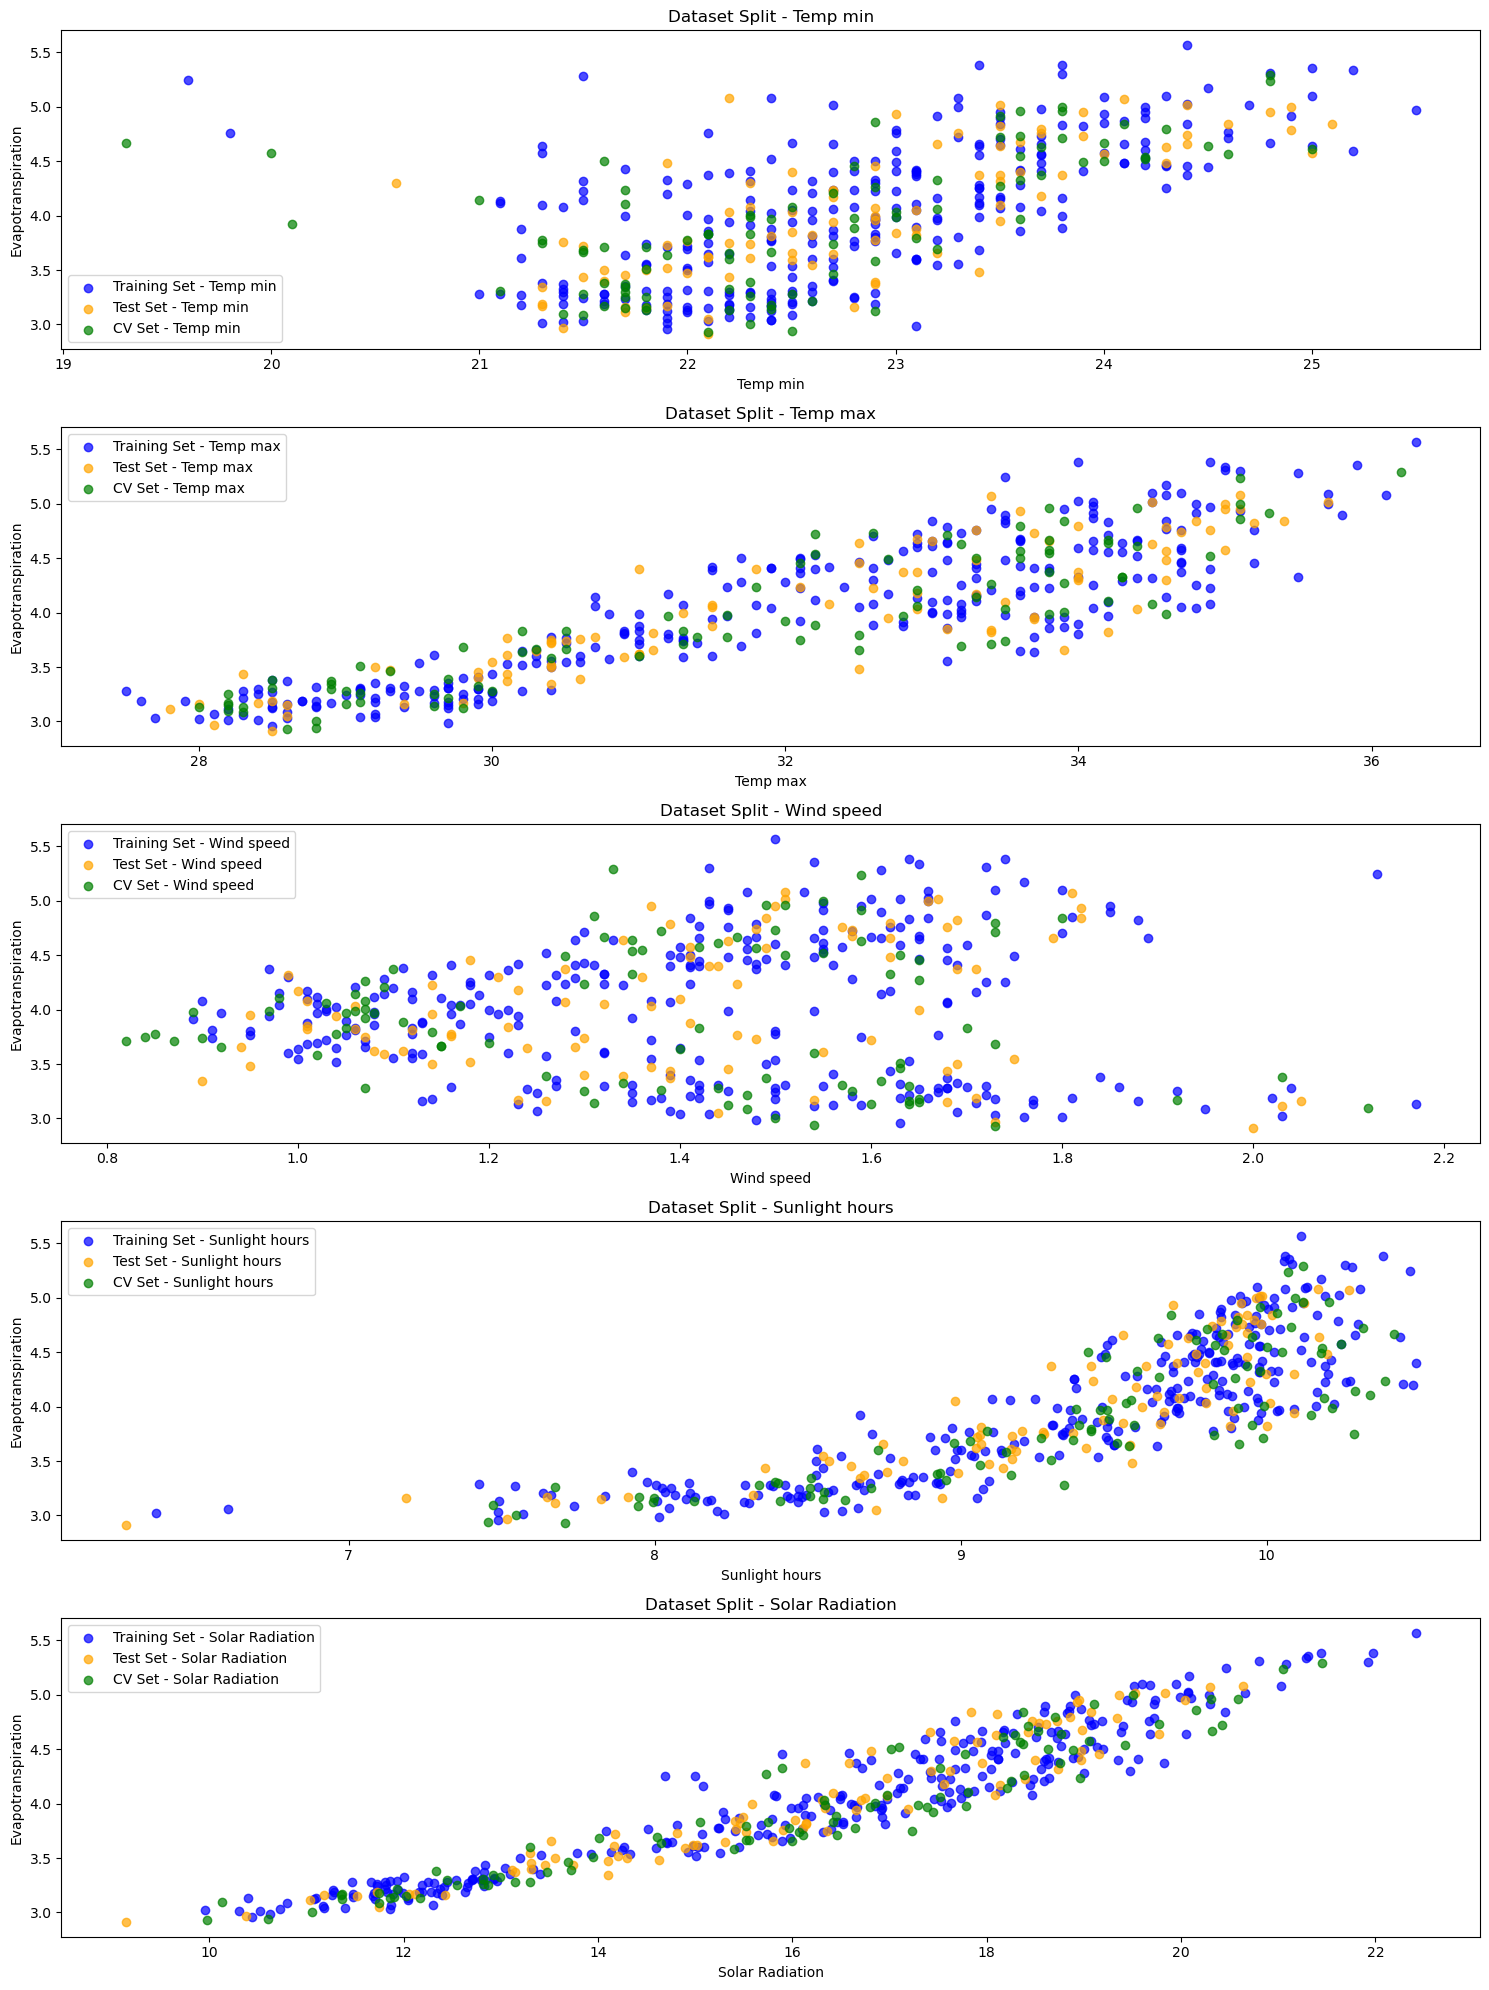

In [32]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

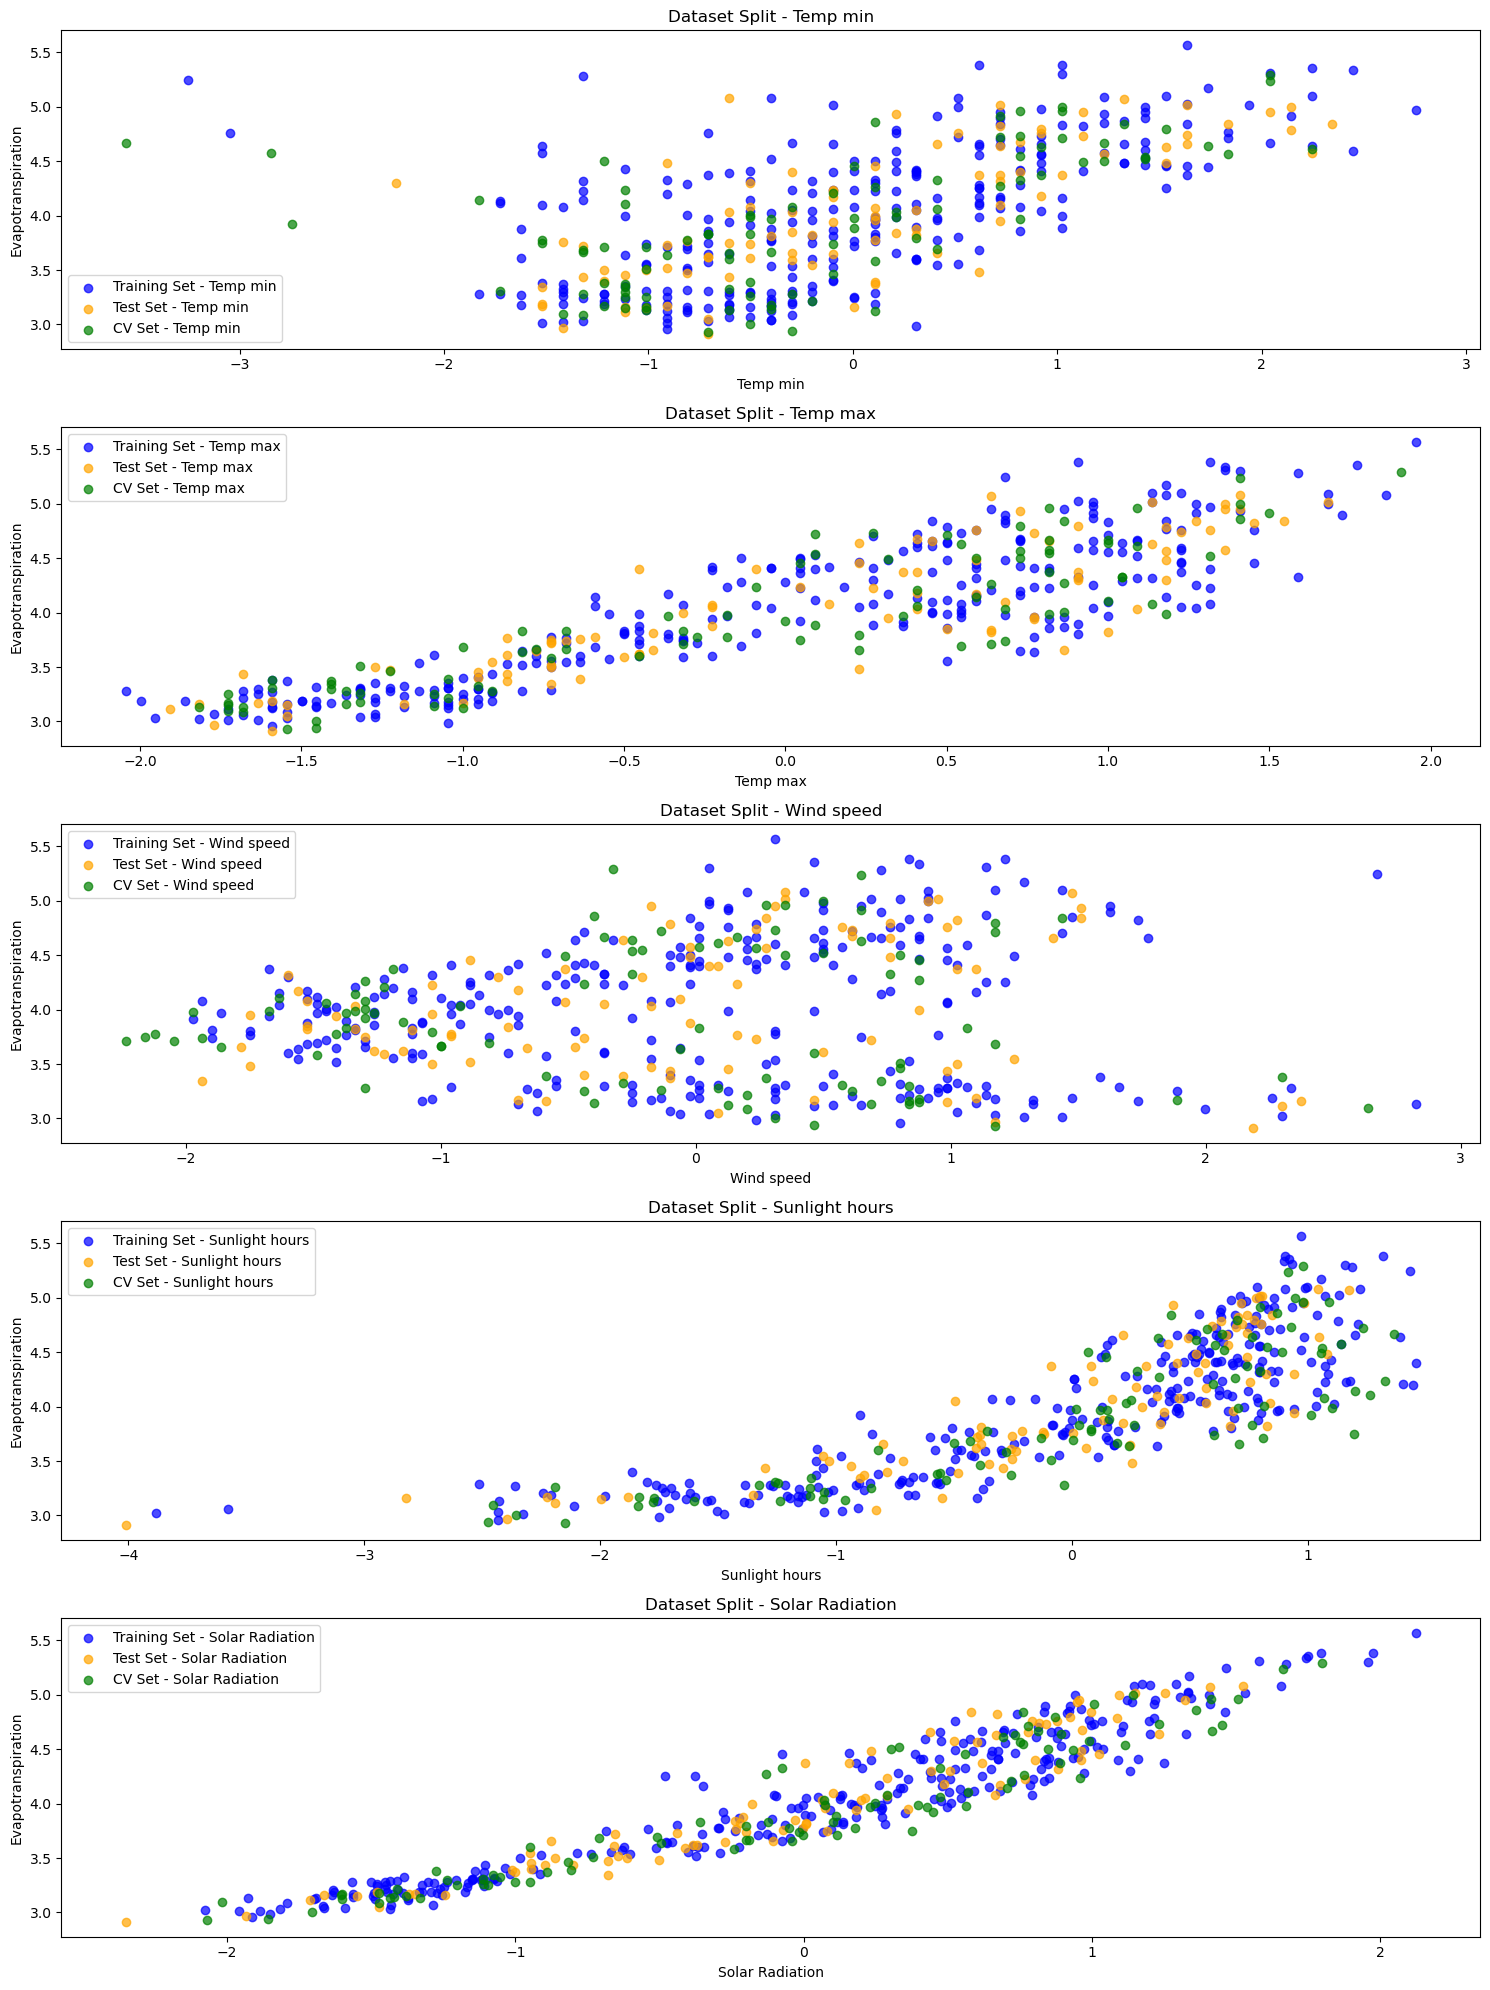

In [33]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 2s 10ms/step - loss: 14.2011 - mae: 3.7304
Epoch 2/150
9/9 [==============================] - 0s 6ms/step - loss: 13.0781 - mae: 3.5790
Epoch 3/150
9/9 [==============================] - 0s 8ms/step - loss: 12.0174 - mae: 3.4291
Epoch 4/150
9/9 [==============================] - 0s 6ms/step - loss: 11.0140 - mae: 3.2786
Epoch 5/150
9/9 [==============================] - 0s 6ms/step - loss: 10.0387 - mae: 3.1261
Epoch 6/150
9/9 [==============================] - 0s 6ms/step - loss: 9.1175 - mae: 2.9730
Epoch 7/150
9/9 [==============================] - 0s 4ms/step - loss: 8.2438 - mae: 2.8189
Epoch 8/150
9/9 [==============================] - 0s 4ms/step - loss: 7.4340 - mae: 2.6682
Epoch 9/150
9/9 [==============================] - 0s 4ms/step - loss: 6.6748 - mae: 2.5154
Epoch 10/150
9/9 [==============================] - 0s 4ms/step - loss: 5.9610 - mae: 2.3615
Epoch 11/150
9/9 [==============================] - 0s 4ms/step - loss: 5

9/9 [==============================] - 0s 5ms/step - loss: 0.2990 - mae: 0.4433
Epoch 90/150
9/9 [==============================] - 0s 7ms/step - loss: 0.2923 - mae: 0.4386
Epoch 91/150
9/9 [==============================] - 0s 8ms/step - loss: 0.2856 - mae: 0.4337
Epoch 92/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2779 - mae: 0.4285
Epoch 93/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2714 - mae: 0.4232
Epoch 94/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2652 - mae: 0.4187
Epoch 95/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2584 - mae: 0.4133
Epoch 96/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2519 - mae: 0.4084
Epoch 97/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2458 - mae: 0.4037
Epoch 98/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2398 - mae: 0.3986
Epoch 99/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2335 - ma

9/9 [==============================] - 0s 7ms/step - loss: 0.2236 - mae: 0.2907
Epoch 115/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2207 - mae: 0.2881
Epoch 116/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2161 - mae: 0.2832
Epoch 117/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2127 - mae: 0.2795
Epoch 118/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2091 - mae: 0.2765
Epoch 119/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2057 - mae: 0.2736
Epoch 120/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2022 - mae: 0.2704
Epoch 121/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1990 - mae: 0.2667
Epoch 122/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1959 - mae: 0.2631
Epoch 123/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1927 - mae: 0.2598
Epoch 124/150
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1901 - mae: 0.1685
Epoch 139/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1871 - mae: 0.1656
Epoch 140/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1841 - mae: 0.1629
Epoch 141/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1813 - mae: 0.1606
Epoch 142/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1786 - mae: 0.1587
Epoch 143/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1759 - mae: 0.1561
Epoch 144/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1732 - mae: 0.1538
Epoch 145/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1707 - mae: 0.1515
Epoch 146/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1681 - mae: 0.1492
Epoch 147/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1656 - mae: 0.1470
Epoch 148/150
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 10.4735 - mae: 2.7946
Epoch 13/150
9/9 [==============================] - 0s 7ms/step - loss: 9.7922 - mae: 2.6759
Epoch 14/150
9/9 [==============================] - 0s 8ms/step - loss: 9.1431 - mae: 2.5570
Epoch 15/150
9/9 [==============================] - 0s 6ms/step - loss: 8.5317 - mae: 2.4397
Epoch 16/150
9/9 [==============================] - 0s 6ms/step - loss: 7.9481 - mae: 2.3219
Epoch 17/150
9/9 [==============================] - 0s 6ms/step - loss: 7.4042 - mae: 2.2084
Epoch 18/150
9/9 [==============================] - 0s 5ms/step - loss: 6.8894 - mae: 2.0943
Epoch 19/150
9/9 [==============================] - 0s 6ms/step - loss: 6.4140 - mae: 1.9827
Epoch 20/150
9/9 [==============================] - 0s 5ms/step - loss: 5.9707 - mae: 1.8700
Epoch 21/150
9/9 [==============================] - 0s 4ms/step - loss: 5.5637 - mae: 1.7627
Epoch 22/150
9/9 [==============================] - 0s 5ms/step - loss: 5.2109 - m

9/9 [==============================] - 0s 4ms/step - loss: 2.4617 - mae: 0.6689
Epoch 38/150
9/9 [==============================] - 0s 8ms/step - loss: 2.3622 - mae: 0.6467
Epoch 39/150
9/9 [==============================] - 0s 7ms/step - loss: 2.2682 - mae: 0.6267
Epoch 40/150
9/9 [==============================] - 0s 6ms/step - loss: 2.1787 - mae: 0.6077
Epoch 41/150
9/9 [==============================] - 0s 9ms/step - loss: 2.0900 - mae: 0.5895
Epoch 42/150
9/9 [==============================] - 0s 6ms/step - loss: 2.0053 - mae: 0.5716
Epoch 43/150
9/9 [==============================] - 0s 6ms/step - loss: 1.9230 - mae: 0.5546
Epoch 44/150
9/9 [==============================] - 0s 6ms/step - loss: 1.8438 - mae: 0.5387
Epoch 45/150
9/9 [==============================] - 0s 6ms/step - loss: 1.7685 - mae: 0.5235
Epoch 46/150
9/9 [==============================] - 0s 6ms/step - loss: 1.6927 - mae: 0.5062
Epoch 47/150
9/9 [==============================] - 0s 6ms/step - loss: 1.6217 - ma

Epoch 125/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0459 - mae: 0.0626
Epoch 126/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.0627
Epoch 127/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0625
Epoch 128/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0419 - mae: 0.0626
Epoch 129/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0407 - mae: 0.0625
Epoch 130/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0396 - mae: 0.0619
Epoch 131/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0385 - mae: 0.0620
Epoch 132/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0374 - mae: 0.0621
Epoch 133/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0365 - mae: 0.0620
Epoch 134/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0355 - mae: 0.0620
Epoch 135/150
9/9 [==============================] - 0s 5ms/

### Computing the errors on the train, cross validation and test sets

In [35]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.04
Model 2: Training MSE: 0.03, CV MSE: 0.04
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.00, CV MSE: 0.00
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [36]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 6
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [37]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.88          3.922224
1           3.95          4.007306
2           3.61          3.657113
3           3.65          3.696151
4           3.77          3.761329
5           4.66          4.574777
6           4.73          4.667342

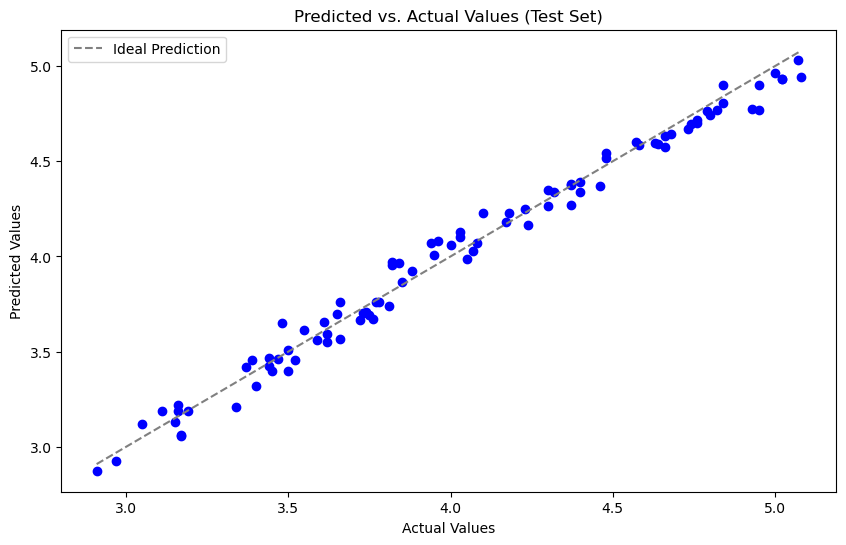

In [38]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [39]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07251475015901265
RAE: 0.11870368567828085
MAE: 0.060164424543795364
R2: 0.9848204911934534


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [40]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [41]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [42]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 23.3441 - mae: 4.7829
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 22.0809 - mae: 4.6513
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 20.9252 - mae: 4.5268
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 19.8204 - mae: 4.4043
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 18.7933 - mae: 4.2868
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 17.8339 - mae: 4.1726
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 16.9085 - mae: 4.0597
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 16.0347 - mae: 3.9492
Epoch 9/300
9/9 [==============================] - 0s 6ms/step - loss: 15.2022 - mae: 3.8401
Epoch 10/300
9/9 [==============================] - 0s 4ms/step - loss: 14.3925 - mae: 3.7311
Epoch 11/300
9/9 [==============================] - 0s 8ms/step - los

Epoch 89/300
9/9 [==============================] - 0s 12ms/step - loss: 0.3664 - mae: 0.4924
Epoch 90/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3510 - mae: 0.4821
Epoch 91/300
9/9 [==============================] - 0s 11ms/step - loss: 0.3370 - mae: 0.4725
Epoch 92/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3238 - mae: 0.4631
Epoch 93/300
9/9 [==============================] - 0s 10ms/step - loss: 0.3104 - mae: 0.4534
Epoch 94/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2983 - mae: 0.4442
Epoch 95/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2861 - mae: 0.4350
Epoch 96/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2748 - mae: 0.4261
Epoch 97/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2638 - mae: 0.4175
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2527 - mae: 0.4090
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - 

9/9 [==============================] - 0s 5ms/step - loss: 0.0212 - mae: 0.1187
Epoch 264/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0211 - mae: 0.1186
Epoch 265/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0210 - mae: 0.1183
Epoch 266/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0210 - mae: 0.1182
Epoch 267/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0209 - mae: 0.1178
Epoch 268/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0208 - mae: 0.1176
Epoch 269/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0207 - mae: 0.1174
Epoch 270/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0207 - mae: 0.1176
Epoch 271/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0206 - mae: 0.1170
Epoch 272/300
9/9 [==============================] - 0s 18ms/step - loss: 0.0205 - mae: 0.1168
Epoch 273/300
9/9 [==============================] - 0s 11ms/step - los

9/9 [==============================] - 0s 5ms/step - loss: 0.0970 - mae: 0.1597
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0959 - mae: 0.1581
Epoch 139/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0950 - mae: 0.1568
Epoch 140/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0941 - mae: 0.1555
Epoch 141/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0931 - mae: 0.1540
Epoch 142/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0923 - mae: 0.1528
Epoch 143/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0915 - mae: 0.1519
Epoch 144/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0908 - mae: 0.1508
Epoch 145/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0898 - mae: 0.1490
Epoch 146/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0890 - mae: 0.1479
Epoch 147/300
9/9 [==============================] - 0s 8ms/step - loss:

9/9 [==============================] - 0s 4ms/step - loss: 6.0351 - mae: 2.3179
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 5.4361 - mae: 2.1709
Epoch 13/300
9/9 [==============================] - 0s 6ms/step - loss: 4.8909 - mae: 2.0293
Epoch 14/300
9/9 [==============================] - 0s 7ms/step - loss: 4.4115 - mae: 1.8922
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 3.9856 - mae: 1.7623
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 3.6142 - mae: 1.6484
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 3.2991 - mae: 1.5417
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 3.0347 - mae: 1.4544
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 2.8084 - mae: 1.3778
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 2.6243 - mae: 1.3154
Epoch 21/300
9/9 [==============================] - 0s 4ms/step - loss: 2.4614 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.0905 - mae: 0.1099
Epoch 187/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0898 - mae: 0.1100
Epoch 188/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0890 - mae: 0.1097
Epoch 189/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0885 - mae: 0.1098
Epoch 190/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0877 - mae: 0.1093
Epoch 191/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0871 - mae: 0.1091
Epoch 192/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0864 - mae: 0.1090
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0858 - mae: 0.1092
Epoch 194/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0851 - mae: 0.1089
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0845 - mae: 0.1087
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.5832 - mae: 0.3766
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5607 - mae: 0.3648
Epoch 62/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5400 - mae: 0.3541
Epoch 63/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5205 - mae: 0.3444
Epoch 64/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5017 - mae: 0.3344
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4845 - mae: 0.3253
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4672 - mae: 0.3149
Epoch 67/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4512 - mae: 0.3056
Epoch 68/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4358 - mae: 0.2975
Epoch 69/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4217 - mae: 0.2899
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4079 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.1201
Epoch 235/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.1202
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0392 - mae: 0.1198
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0391 - mae: 0.1196
Epoch 238/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0388 - mae: 0.1193
Epoch 239/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0386 - mae: 0.1197
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0385 - mae: 0.1197
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0383 - mae: 0.1197
Epoch 242/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0381 - mae: 0.1198
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0379 - mae: 0.1196
Epoch 244/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1937 - mae: 0.1368
Epoch 110/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1889 - mae: 0.1358
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1843 - mae: 0.1348
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1799 - mae: 0.1343
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1754 - mae: 0.1328
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1713 - mae: 0.1319
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1672 - mae: 0.1310
Epoch 116/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1633 - mae: 0.1308
Epoch 117/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1594 - mae: 0.1298
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1558 - mae: 0.1295
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - mae: 0.1263
Epoch 284/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0346 - mae: 0.1262
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0345 - mae: 0.1251
Epoch 286/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - mae: 0.1257
Epoch 287/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0346 - mae: 0.1251
Epoch 288/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0347 - mae: 0.1252
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0346 - mae: 0.1256
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0347 - mae: 0.1266
Epoch 291/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0345 - mae: 0.1260
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0346 - mae: 0.1261
Epoch 293/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0493 - mae: 0.1344
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0489 - mae: 0.1344
Epoch 159/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0486 - mae: 0.1346
Epoch 160/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0483 - mae: 0.1348
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0480 - mae: 0.1351
Epoch 162/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0476 - mae: 0.1352
Epoch 163/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0473 - mae: 0.1353
Epoch 164/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0471 - mae: 0.1354
Epoch 165/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0469 - mae: 0.1357
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0466 - mae: 0.1355
Epoch 167/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [43]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.01, CV MSE: 0.01


In [44]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 6
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [45]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.88          3.930405
1           3.95          4.279594
2           3.61          3.585427
3           3.65          3.789923
4           3.77          3.733900
5           4.66          4.444437
6           4.73          4.575969

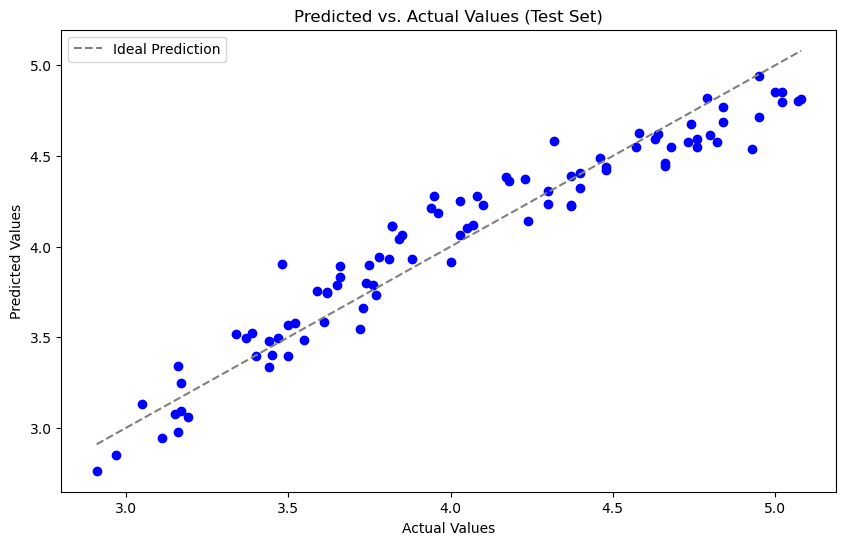

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16001895529757612
RAE: 0.26151058131735017
MAE: 0.13254545170327892
R2: 0.926082397884834


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [48]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [49]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [50]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 14.9660 - mae: 3.7507
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 14.0995 - mae: 3.6150
Epoch 3/300
9/9 [==============================] - 0s 13ms/step - loss: 13.2948 - mae: 3.4820
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 12.5417 - mae: 3.3545
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 11.8176 - mae: 3.2254
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 11.1358 - mae: 3.1035
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 10.4853 - mae: 2.9868
Epoch 8/300
9/9 [==============================] - 0s 10ms/step - loss: 9.8681 - mae: 2.8763
Epoch 9/300
9/9 [==============================] - 0s 6ms/step - loss: 9.2602 - mae: 2.7664
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 8.6662 - mae: 2.6646
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - loss

9/9 [==============================] - 0s 6ms/step - loss: 0.0920 - mae: 0.2420
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0888 - mae: 0.2374
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0857 - mae: 0.2327
Epoch 92/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0827 - mae: 0.2283
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0799 - mae: 0.2244
Epoch 94/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0772 - mae: 0.2206
Epoch 95/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0747 - mae: 0.2171
Epoch 96/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0723 - mae: 0.2134
Epoch 97/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0700 - mae: 0.2099
Epoch 98/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0679 - mae: 0.2065
Epoch 99/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0657 - m

9/9 [==============================] - 0s 4ms/step - loss: 0.0198 - mae: 0.1124
Epoch 264/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0197 - mae: 0.1123
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0197 - mae: 0.1122
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - mae: 0.1128
Epoch 267/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - mae: 0.1131
Epoch 268/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0197 - mae: 0.1119
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0196 - mae: 0.1121
Epoch 270/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0196 - mae: 0.1119
Epoch 271/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0196 - mae: 0.1120
Epoch 272/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0196 - mae: 0.1119
Epoch 273/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0945 - mae: 0.1596
Epoch 138/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0935 - mae: 0.1580
Epoch 139/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0926 - mae: 0.1568
Epoch 140/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0918 - mae: 0.1555
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0910 - mae: 0.1545
Epoch 142/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0902 - mae: 0.1532
Epoch 143/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0893 - mae: 0.1520
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0886 - mae: 0.1512
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0880 - mae: 0.1506
Epoch 146/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0872 - mae: 0.1494
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 12.0363 - mae: 3.2639
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 11.3631 - mae: 3.1581
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 10.7218 - mae: 3.0522
Epoch 14/300
9/9 [==============================] - 0s 4ms/step - loss: 10.0992 - mae: 2.9457
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 9.4839 - mae: 2.8382
Epoch 16/300
9/9 [==============================] - 0s 9ms/step - loss: 8.9079 - mae: 2.7315
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 8.3383 - mae: 2.6272
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 7.8015 - mae: 2.5263
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 7.2883 - mae: 2.4274
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 6.7930 - mae: 2.3306
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 6.3304 

9/9 [==============================] - 0s 4ms/step - loss: 0.1065 - mae: 0.1424
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1058 - mae: 0.1420
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1050 - mae: 0.1411
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1042 - mae: 0.1406
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1036 - mae: 0.1404
Epoch 191/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1028 - mae: 0.1397
Epoch 192/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1021 - mae: 0.1390
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1014 - mae: 0.1384
Epoch 194/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1007 - mae: 0.1382
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1000 - mae: 0.1376
Epoch 196/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.8226 - mae: 0.5261
Epoch 61/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7941 - mae: 0.5119
Epoch 62/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7670 - mae: 0.4977
Epoch 63/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7412 - mae: 0.4847
Epoch 64/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7164 - mae: 0.4716
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6923 - mae: 0.4589
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6691 - mae: 0.4466
Epoch 67/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6463 - mae: 0.4340
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6246 - mae: 0.4217
Epoch 69/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6054 - mae: 0.4106
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5858 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0488 - mae: 0.1319
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0485 - mae: 0.1319
Epoch 236/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0481 - mae: 0.1317
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0478 - mae: 0.1318
Epoch 238/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0476 - mae: 0.1321
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0472 - mae: 0.1319
Epoch 240/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0469 - mae: 0.1318
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0465 - mae: 0.1316
Epoch 242/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0462 - mae: 0.1315
Epoch 243/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0460 - mae: 0.1316
Epoch 244/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1249 - mae: 0.1390
Epoch 110/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1222 - mae: 0.1385
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1195 - mae: 0.1380
Epoch 112/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1171 - mae: 0.1373
Epoch 113/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1147 - mae: 0.1378
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1123 - mae: 0.1379
Epoch 115/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1101 - mae: 0.1380
Epoch 116/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1079 - mae: 0.1374
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1059 - mae: 0.1364
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1039 - mae: 0.1364
Epoch 119/300
9/9 [==============================] - 0s 9ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0409 - mae: 0.1399
Epoch 284/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0409 - mae: 0.1401
Epoch 285/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0408 - mae: 0.1397
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0408 - mae: 0.1398
Epoch 287/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0407 - mae: 0.1402
Epoch 288/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0407 - mae: 0.1396
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0410 - mae: 0.1408
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0409 - mae: 0.1402
Epoch 291/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0407 - mae: 0.1389
Epoch 292/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - mae: 0.1396
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0622 - mae: 0.1470
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0613 - mae: 0.1465
Epoch 159/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0606 - mae: 0.1463
Epoch 160/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0599 - mae: 0.1463
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0593 - mae: 0.1463
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0586 - mae: 0.1464
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0580 - mae: 0.1463
Epoch 164/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0575 - mae: 0.1459
Epoch 165/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0569 - mae: 0.1461
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0563 - mae: 0.1460
Epoch 167/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [51]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.02
Model 6: Training MSE: 0.01, CV MSE: 0.02


In [52]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 4
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [53]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.88          3.836070
1           3.95          4.228124
2           3.61          3.505539
3           3.65          3.680243
4           3.77          3.718559
5           4.66          4.450370
6           4.73          4.545523

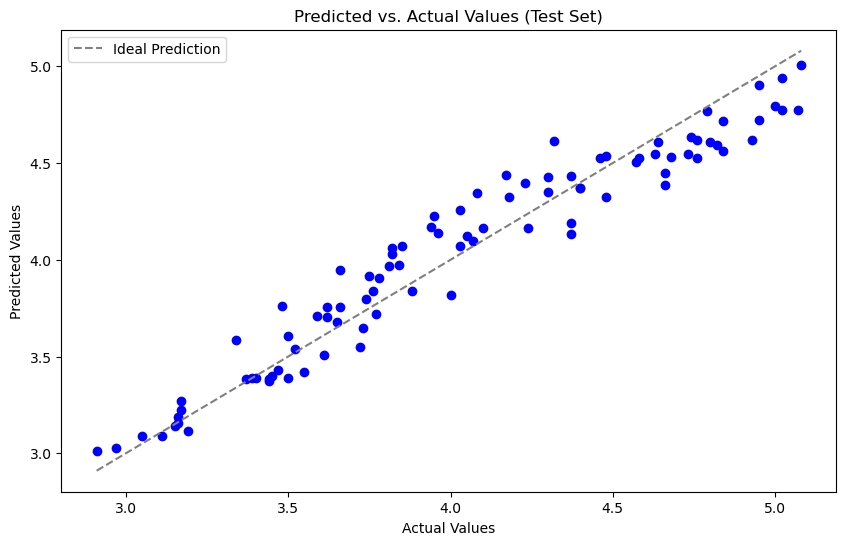

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15276788430269617
RAE: 0.24825228862351373
MAE: 0.1258255462024523
R2: 0.9326295983378083


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [56]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [57]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [58]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 15.1531 - mae: 3.8151
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 14.3595 - mae: 3.7022
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 13.5952 - mae: 3.5885
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 12.8667 - mae: 3.4770
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 12.1517 - mae: 3.3636
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 11.4764 - mae: 3.2514
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 10.8140 - mae: 3.1380
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 10.1859 - mae: 3.0279
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 9.5705 - mae: 2.9187
Epoch 10/300
9/9 [==============================] - 0s 4ms/step - loss: 8.9825 - mae: 2.8108
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 5ms/step - loss: 0.1469 - mae: 0.3054
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1424 - mae: 0.2999
Epoch 91/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1383 - mae: 0.2945
Epoch 92/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1343 - mae: 0.2897
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1303 - mae: 0.2851
Epoch 94/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1266 - mae: 0.2810
Epoch 95/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1232 - mae: 0.2771
Epoch 96/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1195 - mae: 0.2726
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1161 - mae: 0.2685
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1130 - mae: 0.2643
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1098 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0248 - mae: 0.1246
Epoch 264/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0248 - mae: 0.1246
Epoch 265/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0246 - mae: 0.1243
Epoch 266/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0249 - mae: 0.1246
Epoch 267/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0246 - mae: 0.1239
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0245 - mae: 0.1240
Epoch 269/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0245 - mae: 0.1241
Epoch 270/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0245 - mae: 0.1238
Epoch 271/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0245 - mae: 0.1240
Epoch 272/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0245 - mae: 0.1238
Epoch 273/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1168 - mae: 0.1940
Epoch 138/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1153 - mae: 0.1922
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1140 - mae: 0.1905
Epoch 140/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1126 - mae: 0.1886
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1113 - mae: 0.1869
Epoch 142/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1100 - mae: 0.1853
Epoch 143/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1089 - mae: 0.1838
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1076 - mae: 0.1820
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1065 - mae: 0.1805
Epoch 146/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1053 - mae: 0.1788
Epoch 147/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 9.0557 - mae: 2.8984
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 8.4365 - mae: 2.7870
Epoch 13/300
9/9 [==============================] - 0s 4ms/step - loss: 7.8346 - mae: 2.6754
Epoch 14/300
9/9 [==============================] - 0s 4ms/step - loss: 7.2758 - mae: 2.5662
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 6.7185 - mae: 2.4520
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 6.1992 - mae: 2.3384
Epoch 17/300
9/9 [==============================] - 0s 4ms/step - loss: 5.7067 - mae: 2.2236
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 5.2547 - mae: 2.1123
Epoch 19/300
9/9 [==============================] - 0s 7ms/step - loss: 4.8268 - mae: 2.0010
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 4.4414 - mae: 1.8966
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 4.0815 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0872 - mae: 0.1244
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.1240
Epoch 188/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0859 - mae: 0.1239
Epoch 189/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0853 - mae: 0.1241
Epoch 190/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0846 - mae: 0.1235
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0840 - mae: 0.1232
Epoch 192/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0834 - mae: 0.1229
Epoch 193/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0828 - mae: 0.1226
Epoch 194/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0822 - mae: 0.1225
Epoch 195/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.1223
Epoch 196/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.8576 - mae: 0.5047
Epoch 61/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8303 - mae: 0.4912
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8020 - mae: 0.4769
Epoch 63/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7762 - mae: 0.4641
Epoch 64/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7509 - mae: 0.4514
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7272 - mae: 0.4392
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7048 - mae: 0.4273
Epoch 67/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6825 - mae: 0.4153
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6623 - mae: 0.4039
Epoch 69/300
9/9 [==============================] - 0s 8ms/step - loss: 0.6422 - mae: 0.3926
Epoch 70/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6227 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0613 - mae: 0.1262
Epoch 235/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0608 - mae: 0.1264
Epoch 236/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0604 - mae: 0.1265
Epoch 237/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0599 - mae: 0.1265
Epoch 238/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0594 - mae: 0.1266
Epoch 239/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0590 - mae: 0.1266
Epoch 240/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0586 - mae: 0.1270
Epoch 241/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0582 - mae: 0.1271
Epoch 242/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0577 - mae: 0.1271
Epoch 243/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0573 - mae: 0.1272
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.2329 - mae: 0.1423
Epoch 110/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2272 - mae: 0.1411
Epoch 111/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2219 - mae: 0.1403
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2165 - mae: 0.1393
Epoch 113/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2114 - mae: 0.1382
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2065 - mae: 0.1378
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2017 - mae: 0.1371
Epoch 116/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1971 - mae: 0.1365
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1926 - mae: 0.1358
Epoch 118/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1883 - mae: 0.1352
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0459 - mae: 0.1416
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.1418
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.1425
Epoch 286/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0458 - mae: 0.1427
Epoch 287/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.1424
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0457 - mae: 0.1421
Epoch 289/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0457 - mae: 0.1422
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0457 - mae: 0.1420
Epoch 291/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.1422
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0456 - mae: 0.1418
Epoch 293/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0871 - mae: 0.1419
Epoch 158/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0857 - mae: 0.1419
Epoch 159/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0844 - mae: 0.1422
Epoch 160/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0832 - mae: 0.1422
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.1421
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0808 - mae: 0.1422
Epoch 163/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0796 - mae: 0.1421
Epoch 164/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0785 - mae: 0.1420
Epoch 165/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0774 - mae: 0.1421
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0764 - mae: 0.1421
Epoch 167/300
9/9 [==============================] - 0s 4ms/step - loss: 

In [59]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.02, CV MSE: 0.01
Model 6: Training MSE: 0.02, CV MSE: 0.01


In [60]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 4
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [61]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.88          3.941530
1           3.95          4.299035
2           3.61          3.593364
3           3.65          3.871080
4           3.77          3.785742
5           4.66          4.493457
6           4.73          4.610249

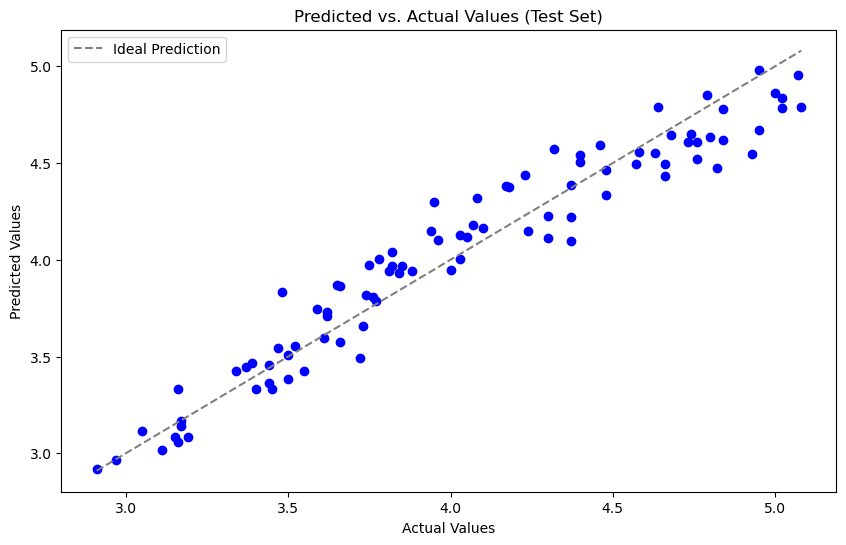

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1557173310689811
RAE: 0.2536480059040591
MAE: 0.128560341026472
R2: 0.9300030830969934


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [64]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [65]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [66]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 1s 3ms/step - loss: 19.1372 - mae: 4.3293
Epoch 2/250
9/9 [==============================] - 0s 5ms/step - loss: 18.1688 - mae: 4.2175
Epoch 3/250
9/9 [==============================] - 0s 7ms/step - loss: 17.2456 - mae: 4.1087
Epoch 4/250
9/9 [==============================] - 0s 7ms/step - loss: 16.3797 - mae: 4.0035
Epoch 5/250
9/9 [==============================] - 0s 15ms/step - loss: 15.5360 - mae: 3.8985
Epoch 6/250
9/9 [==============================] - 0s 9ms/step - loss: 14.7445 - mae: 3.7972
Epoch 7/250
9/9 [==============================] - 0s 6ms/step - loss: 13.9769 - mae: 3.6964
Epoch 8/250
9/9 [==============================] - 0s 7ms/step - loss: 13.2306 - mae: 3.5957
Epoch 9/250
9/9 [==============================] - 0s 4ms/step - loss: 12.5120 - mae: 3.4954
Epoch 10/250
9/9 [==============================] - 0s 4ms/step - loss: 11.8081 - mae: 3.3951
Epoch 11/250
9/9 [==============================] - 0s 10ms/step - l

Epoch 89/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2562 - mae: 0.4051
Epoch 90/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2503 - mae: 0.4003
Epoch 91/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2446 - mae: 0.3955
Epoch 92/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2392 - mae: 0.3909
Epoch 93/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2341 - mae: 0.3866
Epoch 94/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2287 - mae: 0.3820
Epoch 95/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2239 - mae: 0.3779
Epoch 96/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2186 - mae: 0.3735
Epoch 97/250
9/9 [==============================] - 0s 14ms/step - loss: 0.2139 - mae: 0.3690
Epoch 98/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2091 - mae: 0.3649
Epoch 99/250
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 5ms/step - loss: 5.4002 - mae: 2.1369
Epoch 14/250
9/9 [==============================] - 0s 4ms/step - loss: 4.8345 - mae: 2.0049
Epoch 15/250
9/9 [==============================] - 0s 4ms/step - loss: 4.2952 - mae: 1.8726
Epoch 16/250
9/9 [==============================] - 0s 4ms/step - loss: 3.8162 - mae: 1.7454
Epoch 17/250
9/9 [==============================] - 0s 4ms/step - loss: 3.3806 - mae: 1.6269
Epoch 18/250
9/9 [==============================] - 0s 4ms/step - loss: 2.9845 - mae: 1.5086
Epoch 19/250
9/9 [==============================] - 0s 4ms/step - loss: 2.6461 - mae: 1.3995
Epoch 20/250
9/9 [==============================] - 0s 4ms/step - loss: 2.3480 - mae: 1.2971
Epoch 21/250
9/9 [==============================] - 0s 4ms/step - loss: 2.0941 - mae: 1.2063
Epoch 22/250
9/9 [==============================] - 0s 4ms/step - loss: 1.8831 - mae: 1.1299
Epoch 23/250
9/9 [==============================] - 0s 4ms/step - loss: 1.7000 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0966 - mae: 0.1850
Epoch 189/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0963 - mae: 0.1849
Epoch 190/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.1853
Epoch 191/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0955 - mae: 0.1846
Epoch 192/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0951 - mae: 0.1841
Epoch 193/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0947 - mae: 0.1838
Epoch 194/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0943 - mae: 0.1834
Epoch 195/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0940 - mae: 0.1830
Epoch 196/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0938 - mae: 0.1823
Epoch 197/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0934 - mae: 0.1829
Epoch 198/250
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1978 - mae: 0.2358
Epoch 114/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1948 - mae: 0.2333
Epoch 115/250
9/9 [==============================] - 0s 8ms/step - loss: 0.1921 - mae: 0.2315
Epoch 116/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1892 - mae: 0.2293
Epoch 117/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1864 - mae: 0.2271
Epoch 118/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1837 - mae: 0.2247
Epoch 119/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1812 - mae: 0.2222
Epoch 120/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1787 - mae: 0.2202
Epoch 121/250
9/9 [==============================] - 0s 6ms/step - loss: 0.1762 - mae: 0.2182
Epoch 122/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1739 - mae: 0.2167
Epoch 123/250
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 2.5763 - mae: 0.8966
Epoch 38/250
9/9 [==============================] - 0s 4ms/step - loss: 2.4092 - mae: 0.8360
Epoch 39/250
9/9 [==============================] - 0s 4ms/step - loss: 2.2502 - mae: 0.7783
Epoch 40/250
9/9 [==============================] - 0s 5ms/step - loss: 2.1040 - mae: 0.7257
Epoch 41/250
9/9 [==============================] - 0s 4ms/step - loss: 1.9747 - mae: 0.6778
Epoch 42/250
9/9 [==============================] - 0s 5ms/step - loss: 1.8491 - mae: 0.6326
Epoch 43/250
9/9 [==============================] - 0s 5ms/step - loss: 1.7374 - mae: 0.5920
Epoch 44/250
9/9 [==============================] - 0s 5ms/step - loss: 1.6323 - mae: 0.5532
Epoch 45/250
9/9 [==============================] - 0s 7ms/step - loss: 1.5356 - mae: 0.5193
Epoch 46/250
9/9 [==============================] - 0s 11ms/step - loss: 1.4467 - mae: 0.4878
Epoch 47/250
9/9 [==============================] - 0s 5ms/step - loss: 1.3628 - m

9/9 [==============================] - 0s 4ms/step - loss: 0.0986 - mae: 0.2182
Epoch 212/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0988 - mae: 0.2171
Epoch 213/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0984 - mae: 0.2166
Epoch 214/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0989 - mae: 0.2192
Epoch 215/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0987 - mae: 0.2184
Epoch 216/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0985 - mae: 0.2178
Epoch 217/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0985 - mae: 0.2169
Epoch 218/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0985 - mae: 0.2167
Epoch 219/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0986 - mae: 0.2176
Epoch 220/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0984 - mae: 0.2177
Epoch 221/250
9/9 [==============================] - 0s 4ms/step - loss: 0

In [67]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.03
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.04, CV MSE: 0.03


In [68]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 7ms/step
Selected Model: 3
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [69]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.88          4.021746
1           3.95          3.933322
2           3.61          3.554834
3           3.65          3.531230
4           3.77          3.485065
5           4.66          4.515345
6           4.73          4.654356

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22164998201723532
RAE: 0.34417264981721735
MAE: 0.17444234609603884
R2: 0.8581790437783411


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.02
Mean Squared Error for Decision Tree: 0.02


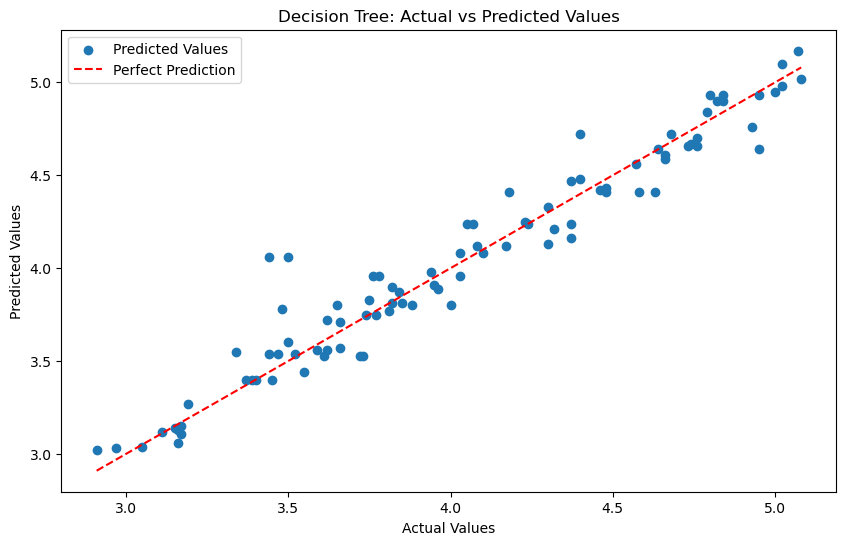

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [72]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1415173979164522
RAE: 0.19279523722942515
MAE: 0.09771739130434781
R2: 0.9421871102869461


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.05


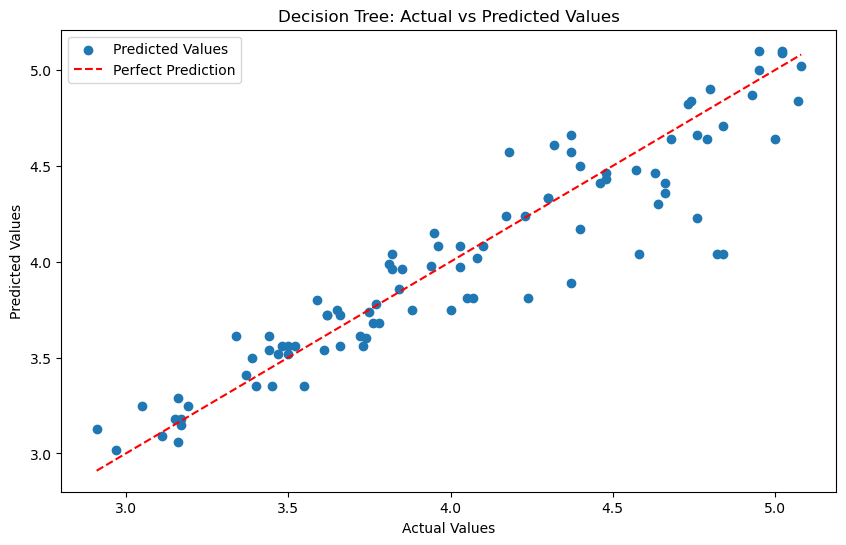

In [73]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2124111067267189
RAE: 0.29659156072112913
MAE: 0.15032608695652178
R2: 0.8697554822741301


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.03


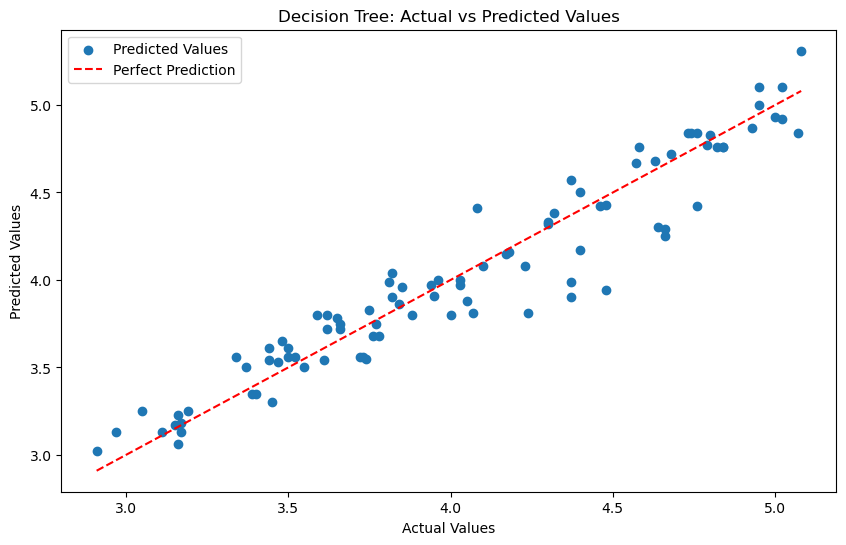

In [75]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [76]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16932410393654254
RAE: 0.25198487624535554
MAE: 0.12771739130434784
R2: 0.9172357887673692


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.04


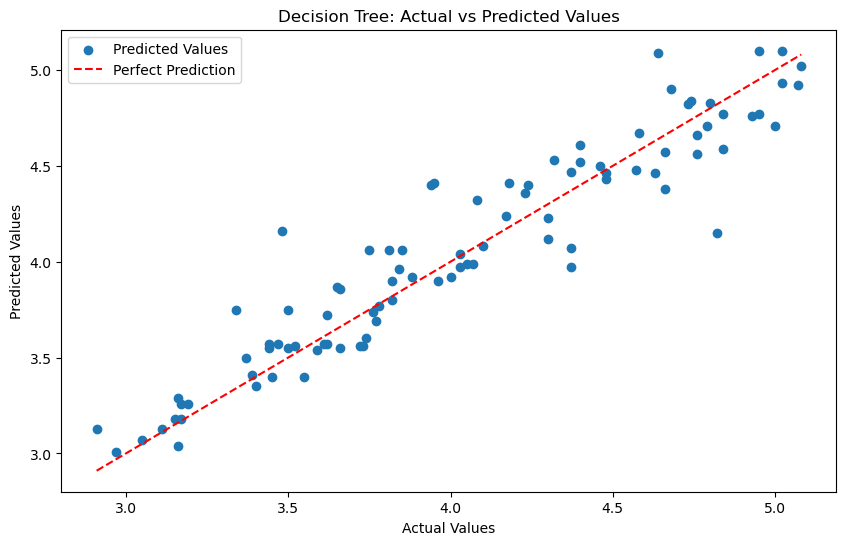

In [77]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19484944020403572
RAE: 0.2845820687468823
MAE: 0.1442391304347826
R2: 0.8904018222639208


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.08
Mean Squared Error for Decision Tree: 0.09


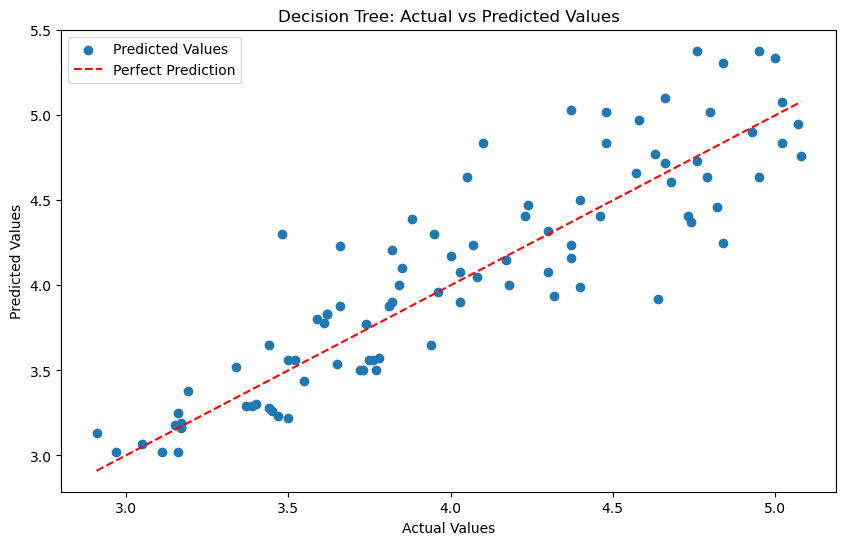

In [79]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.29309443499678894
RAE: 0.44992703860660066
MAE: 0.22804347826086954
R2: 0.7520180027244466


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.08
Mean Squared Error on Test Set for Random Forest: 0.01


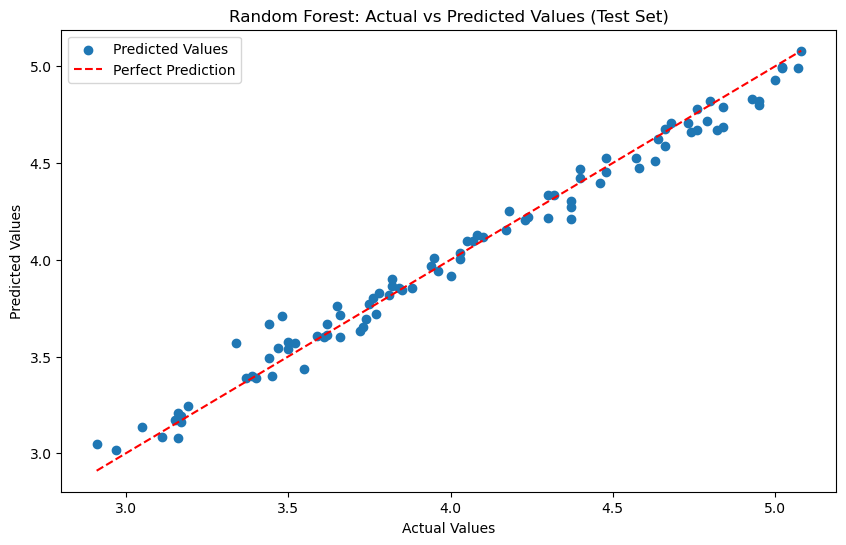

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [82]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Solar Radiation    0.801486
Wind speed         0.079092
Temp max           0.067698
Sunlight hours     0.045521
Temp min           0.006203
dtype: float64


In [83]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07663319535576497
RAE: 0.11580367091381355
MAE: 0.05869456521739191
R2: 0.9830472999613817


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.08
Mean Squared Error on Test Set for Random Forest: 0.02


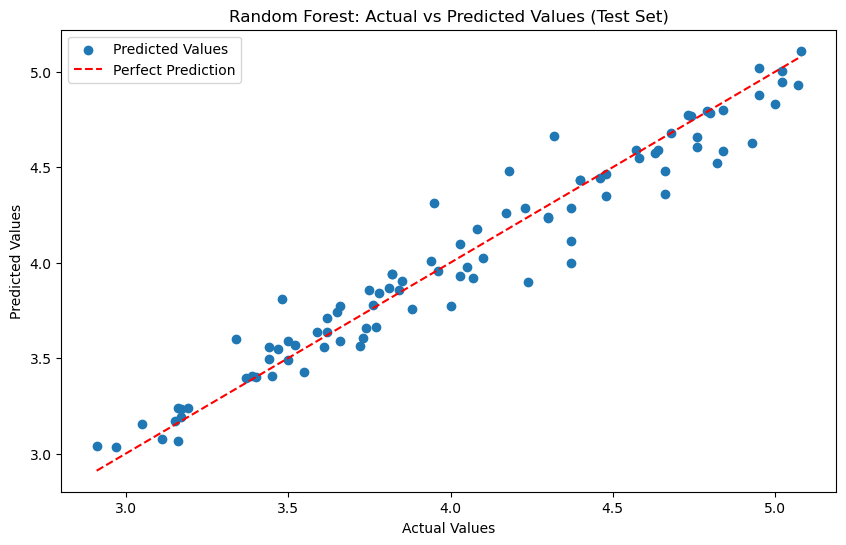

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13760774987654953
RAE: 0.2005327813442619
MAE: 0.10163913043478291
R2: 0.9453373357456198


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.08
Mean Squared Error on Test Set for Random Forest: 0.02


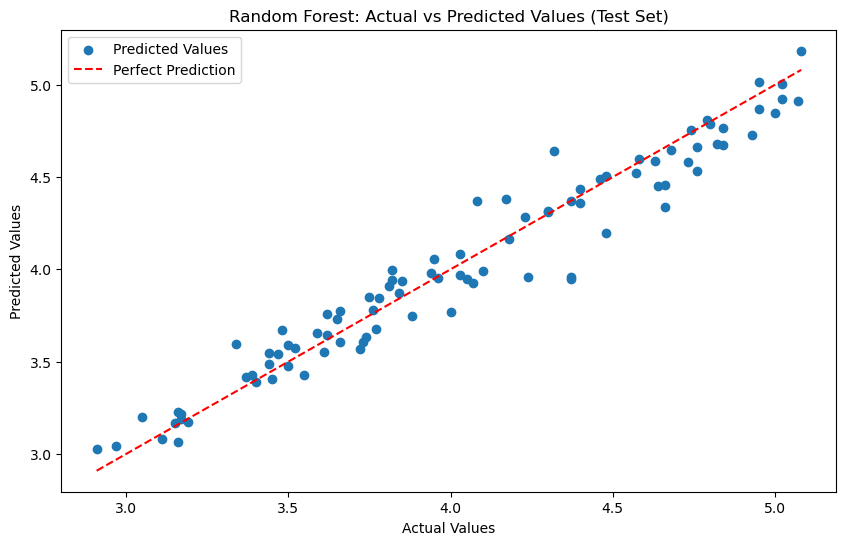

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13721318069530275
RAE: 0.20447875727865714
MAE: 0.10363913043478284
R2: 0.9456503599893465


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.08
Mean Squared Error on Test Set for Random Forest: 0.02


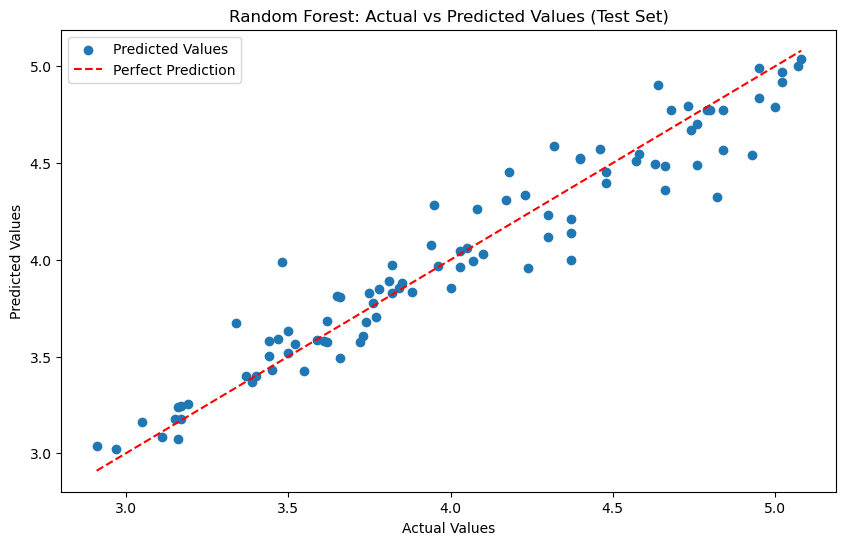

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15786576989438805
RAE: 0.22986167638708252
MAE: 0.116504347826087
R2: 0.9280582575486304


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.08
Mean Squared Error on Test Set for Random Forest: 0.05


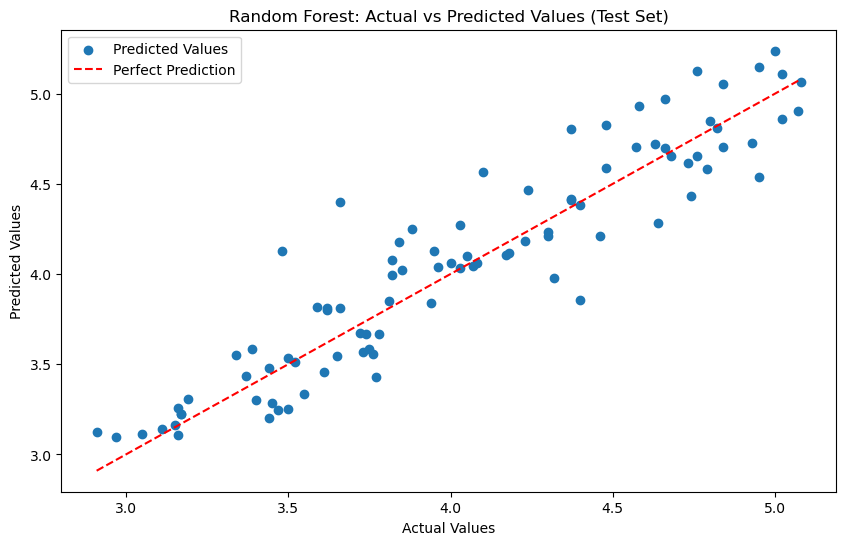

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22112190052390648
RAE: 0.33480533527275425
MAE: 0.16969456521739118
R2: 0.8588540161404746


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


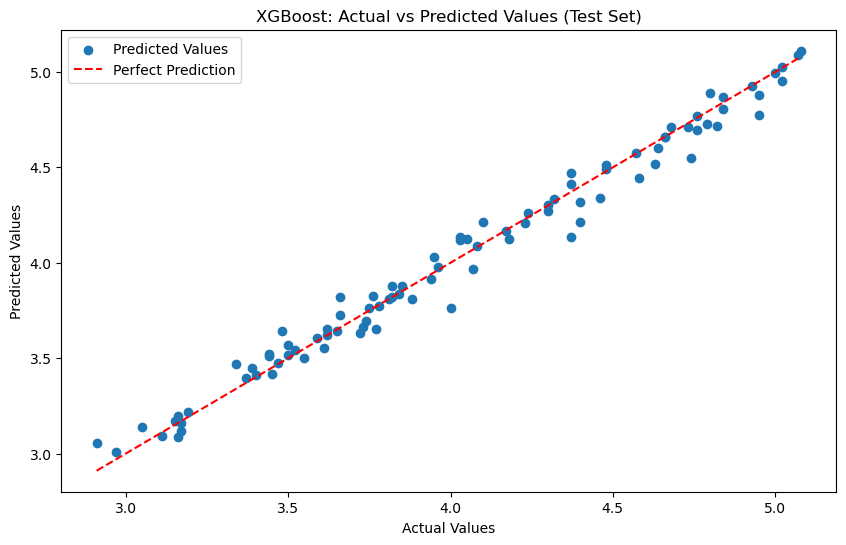

In [92]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07879506983748373
RAE: 0.11339437664301256
MAE: 0.05747342534687206
R2: 0.9820773139226974


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

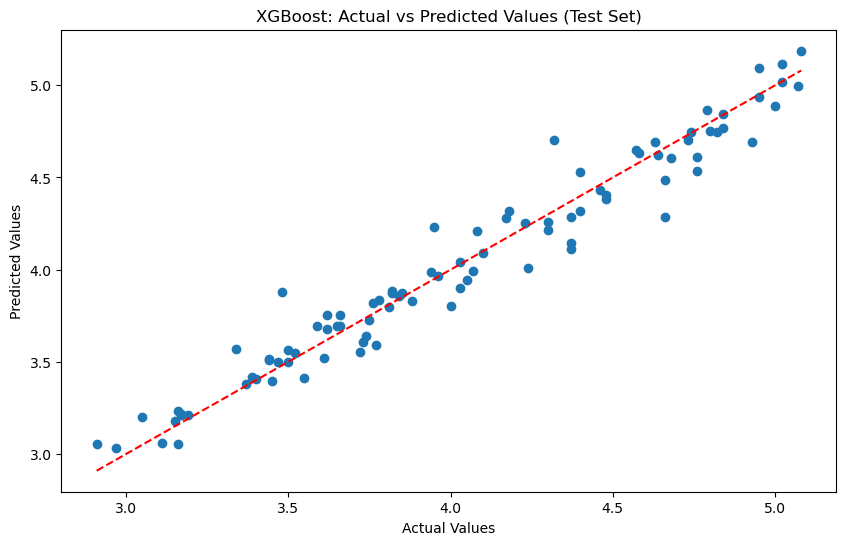

In [94]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [95]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12539799700798485
RAE: 0.18529191197195555
MAE: 0.09391436493915059
R2: 0.9546072799561665


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

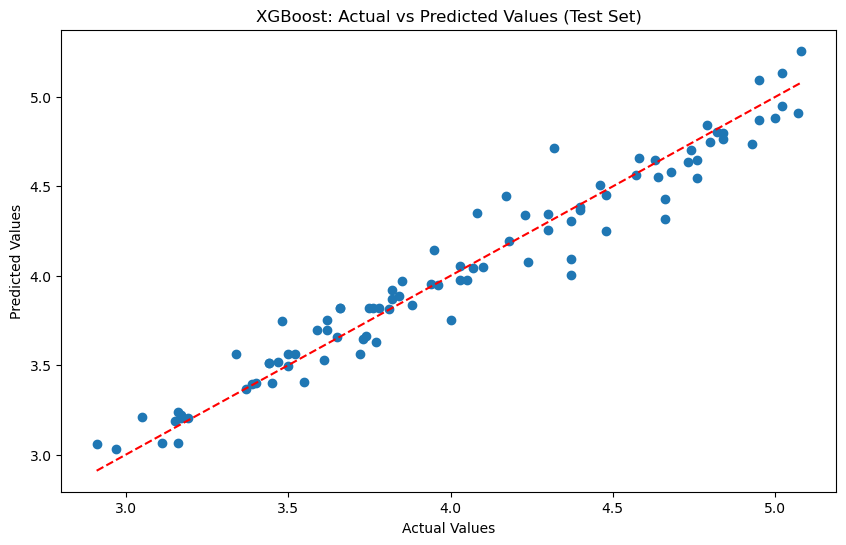

In [96]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1313993163142352
RAE: 0.1958460838144901
MAE: 0.09926369905471802
R2: 0.9501584867521617


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

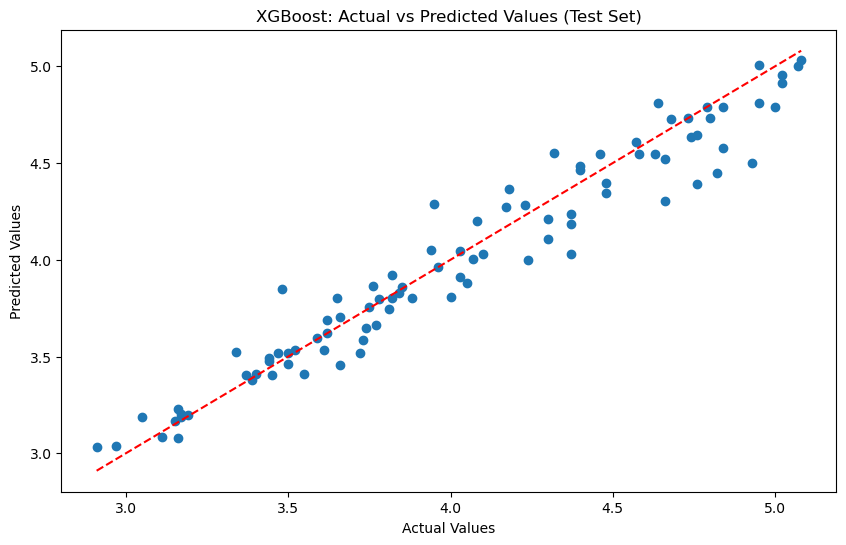

In [98]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14476964835858894
RAE: 0.21108702393450282
MAE: 0.10698850040850433
R2: 0.9394993490411183


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.04
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

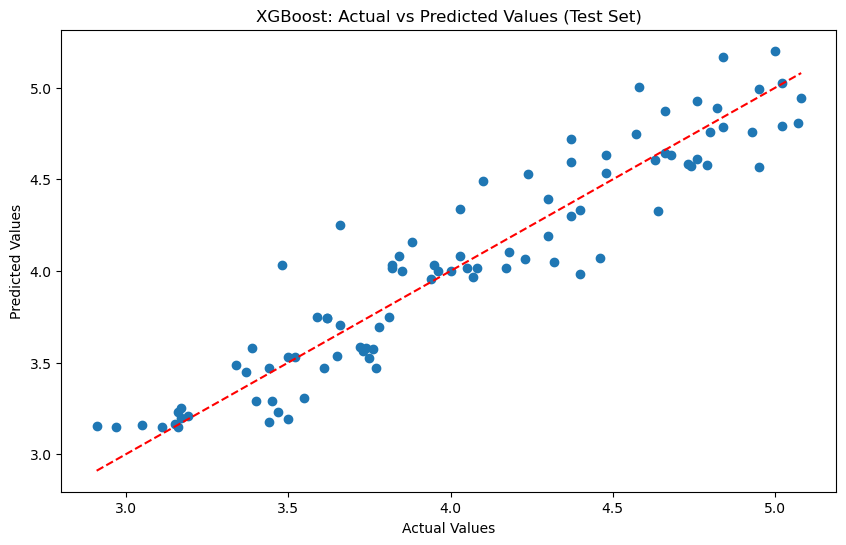

In [100]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [101]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.2025076777463201
RAE: 0.3177517930798322
MAE: 0.16105105472647624
R2: 0.8816173669364432


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


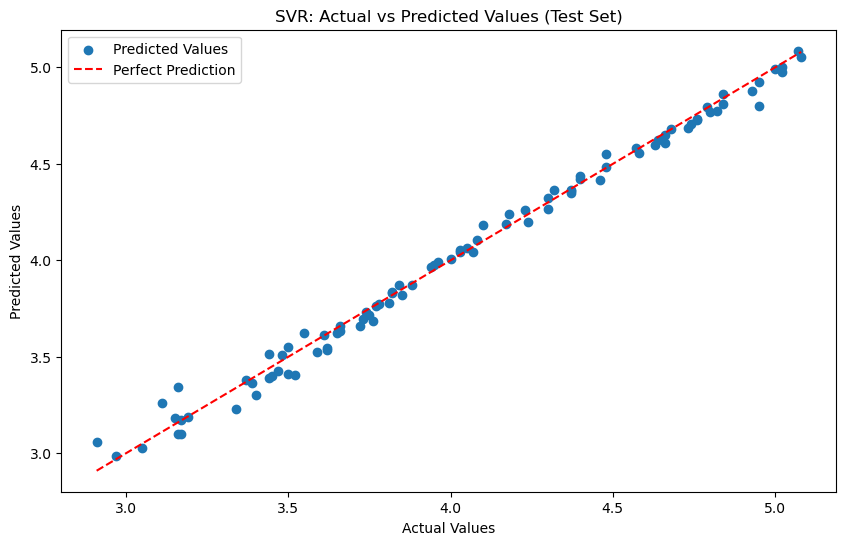

In [102]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [103]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.053436497142283934
RAE: 0.07822487049633788
MAE: 0.03964792071562613
R2: 0.9917570821485826


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.01
Mean Squared Error on Test Set for SVR: 0.01


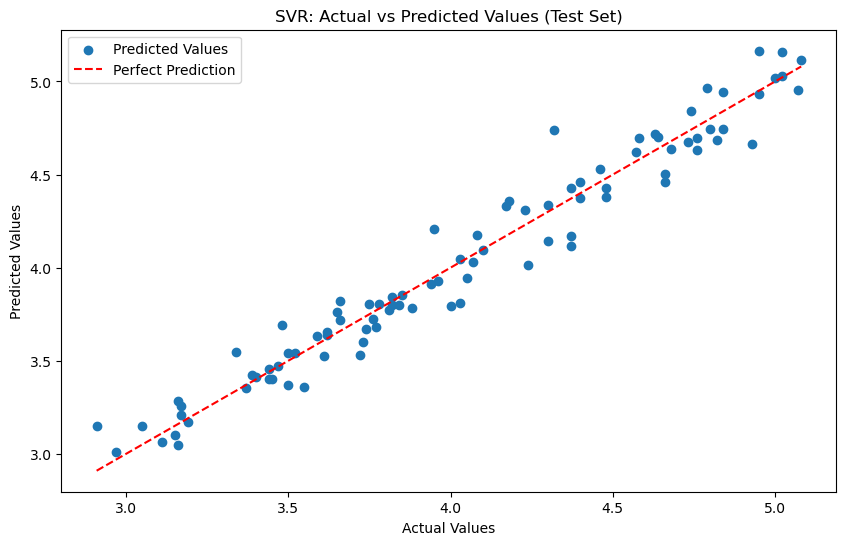

In [104]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [105]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1220923587937287
RAE: 0.1857412553036211
MAE: 0.0941421125681966
R2: 0.9569689466721669


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.01
Mean Squared Error on Test Set for SVR: 0.02


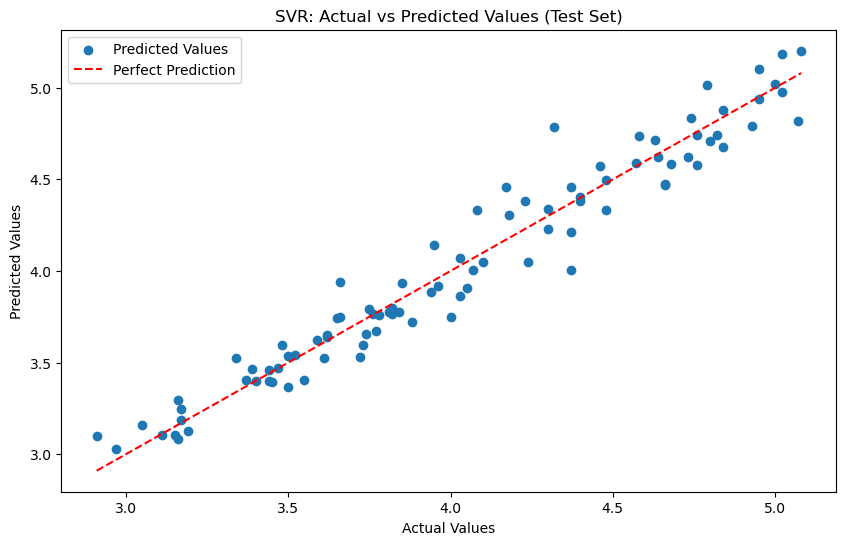

In [106]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [107]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13294076586282624
RAE: 0.20205156099516094
MAE: 0.1024089170103474
R2: 0.9489822429609147


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


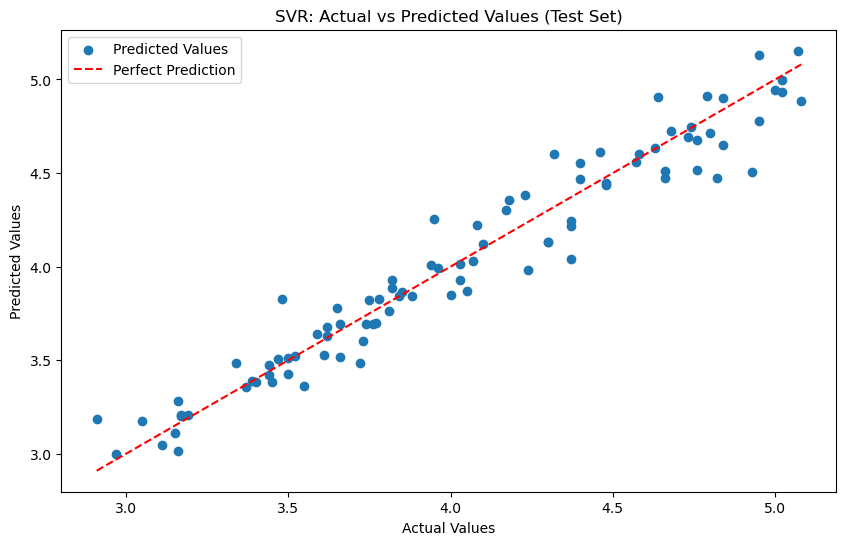

In [108]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [109]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14099971244235487
RAE: 0.21028748772481162
MAE: 0.1065832591080078
R2: 0.9426093078703633


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.04
Mean Squared Error on Test Set for SVR: 0.04


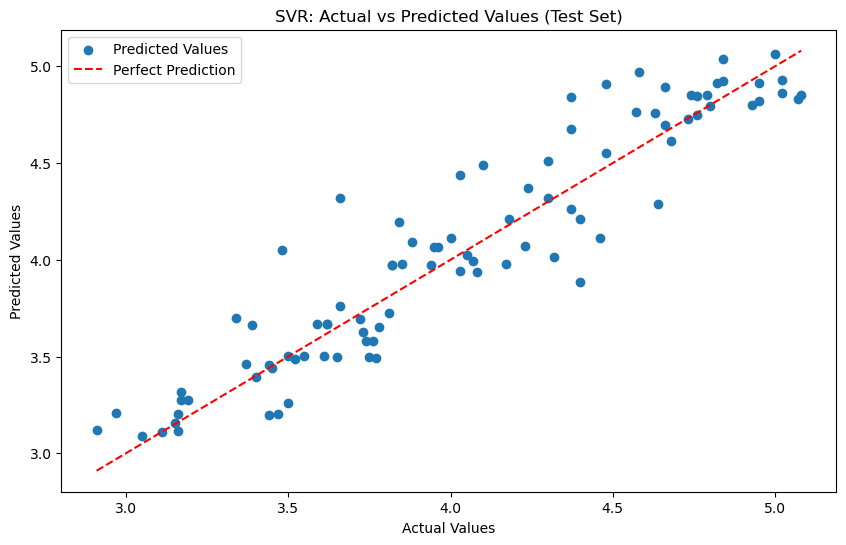

In [110]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20951935055782417
RAE: 0.31312691438900575
MAE: 0.15870695594446724
R2: 0.8732776299050886
